---
# Final Analyses

After `dn_compare.ipynb`, this notebook includes some of the final figures

In [1]:
from linescanning import (
    utils,
    plotting,
    fitting,
    glm
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import holeresponse as hr
import nibabel as nb
import seaborn as sns
import cv2
import pingouin as pg
opj = os.path.join
opd = os.path.dirname

## Read Data

In [2]:
# import subject dictionary containing useful information
include_subjs = ["001","002","005","006","008","010","011","013","014","015","022"]
subj_obj = hr.utils.SubjectsDict(proj_dir="/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC")
subj_obj.proj_dir

'/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC'

In [3]:
pkl_files = []

objs = {}
data_dir = opj(os.path.dirname(hr.viz._save_figure(None, return_figdir=True)), "data")
h5_pkl = opj(data_dir, "dn_full_sample_voxel_correction2.pkl")
print(f"pkl file: '{h5_pkl}'")
with open(h5_pkl, 'rb') as handle:
    h5_obj = pickle.load(handle)

pkl file: '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/data/dn_full_sample_voxel_correction2.pkl'


In [4]:
# get h5-file
deriv = subj_obj.deriv_dir

h5_files = []
for i in include_subjs:
    sub = f"sub-{i}"
    ses = subj_obj.get_session(sub)
    h5 = utils.FindFiles(opj(subj_obj.deriv_dir, "lsprep", sub), extension="h5").files

    if len(h5)>0:
        h5_filt = utils.get_file_from_substring([f"ses-{ses}","desc-0p"], h5)
        h5_files.append(h5_filt)

h5_files

['/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-001/sub-001_ses-4_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-002/sub-002_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-005/sub-005_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-006/sub-006_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-008/sub-008_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-010/sub-010_ses-4_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-011/sub-011_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-013/sub-013_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-014/sub-014_ses-2_d

## Epoch data

In [5]:
# sub_df | average ribbon
sub_ep = fitting.Epoch(
    h5_obj.df_avg.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
sub_df = sub_ep.df_epoch.copy()

In [6]:
# comp_df | depth epochs
comp_ep = fitting.Epoch(
    h5_obj.df_comps.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
comp_df = comp_ep.df_epoch.copy()

comp_excl = pd.concat([utils.select_from_df(comp_df, expression=f"subject = {sub}") for sub in include_subjs])
comp_excl.head()

0         1         2  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  0.630385 -0.239497  1.500266   
                                  -1.894737  0.571895 -0.321802  1.465591   
                                  -1.789474 -0.009266 -1.035793  1.017260   
                                  -1.684211 -0.992481 -1.888901 -0.096061   
                                  -1.578947 -1.135379 -1.780816 -0.489943   

                                                    3         4         5  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  3.240028  2.311503  0.493548   
                                  -1.894737  3.252984  2.429860  0.736565   
                                  -1.789474  3.070313  2.421918  0.873040   
                                  -1.684211  1.696778  1.634299  0.953380   
                                  -1.578947  0.800929  0.760801  0.277005   

                                                    6         7         8  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -0.636957  0.294886  1.226730   
                                  -1.894737 -0.339304  0.437110  1.213524   
                                  -1.789474 -0.095066  0.679145  1.453356   
                                  -1.684211  0.615390  1.306187  1.996985   
                                  -1.578947  0.188339  1.285059  2.381780   

                                                    9        10        11  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  0.187664 -1.508370 -2.492625   
                                  -1.894737  0.055865 -1.746485 -2.736501   
                                  -1.789474  0.286776 -1.526734 -2.603170   
                                  -1.684211  0.737841 -1.171282 -2.353904   
                                  -1.578947  1.129384 -0.906050 -2.245660   

                                                   12        13        14  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -1.341541 -0.190457 -0.026837   
                                  -1.894737 -1.289514  0.157472  0.435645   
                                  -1.789474 -1.468380 -0.333591  0.092663   
                                  -1.684211 -1.357018 -0.360133 -0.049205   
                                  -1.578947 -1.497797 -0.749934 -0.415443   

                                                   15        16        17  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -0.192371 -0.369028 -0.579055   
                                  -1.894737  0.324214  0.270976  0.392322   
                                  -1.789474  0.282739  0.469596  0.646800   
                                  -1.684211  0.033069  0.215174  0.696770   
                                  -1.578947 -0.218742  0.082698  0.698356   

                                                   18        19  
subject task run event_type epoch t                              
001     SRFa 1   act        0     -2.000000 -0.789081 -0.684068  
                                  -1.894737  0.513668  0.452995  
                                  -1.789474  0.824003  0.735401  
                                  -1.684211  1.178366  0.937568  
                                  -1.578947  1.314014  1.006185

In [7]:
# line_df | full line epochs
line_ep = fitting.Epoch(
    h5_obj.df_func.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
line_df = line_ep.df_epoch.copy()

## Plots

### New stimulus config + profile

Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims5.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims5.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims5.svg'


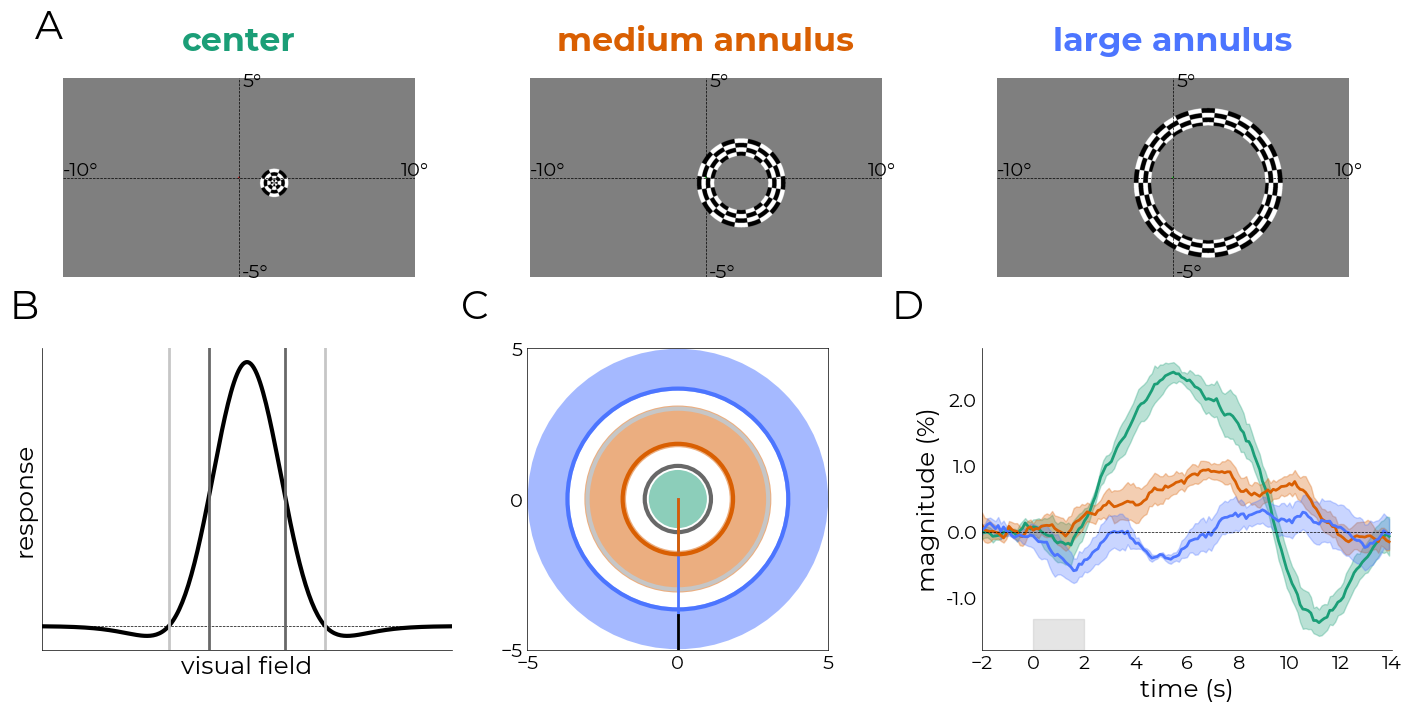

In [88]:
%matplotlib inline
ncols = 4
nrows = int(np.ceil(len(include_subjs)/ncols))

fig = plt.figure(figsize=(14,7), constrained_layout=True)
sfs = fig.subfigures(
    nrows=2, 
    height_ratios=[0.4,0.6], 
    hspace=0
)
sf1 = sfs[0].subplots(ncols=3)

ref_subj = "sub-013"
scr_obj = hr.viz.StimPNGs(ref_subj)
scr_obj.generate_screen_images(
    axs=sf1, 
    annotate=True
)

axs = sfs[1].subplots(
    ncols=3, 
    # gridspec_kw={"wspace": 0.15}
)

prof1d = hr.viz.StimPNGs.get_1d_profile(
    scr_obj.h_pars,
    n_pix=270
)

prof = prof1d.prof_1d.squeeze()
prof /= prof.max()
rf_cm = sns.color_palette("Greys_r", 2)
pl = plotting.LazyPlot(
    prof,
    line_width=3,
    color="k",
    axs=axs[0],
    add_hline=0,
    add_vline={
        "pos": prof1d.zero_cross_pix+[prof1d.metrics.iloc[0].fwhm_obj.t0_,prof1d.metrics.iloc[0].fwhm_obj.t1_],
        "color": [rf_cm[1],rf_cm[1],rf_cm[0],rf_cm[0]],
        "ls": "solid",
        "lw": 2
    },
    x_label="visual field",
    y_label="response",
    # y_lim=[0,prof.max()*1.1],
    x_ticks=[],
    y_ticks=[]
)

# stim dimensions
hr.viz.ExampleStims(
    axs=axs[1],
    fc=0.965,
    radii2=[1.9,3.8]
)

# example profile
sub = include_subjs[include_subjs.index(f"{ref_subj.split('-')[-1]}")]
select_sub = utils.select_from_df(sub_df, expression=f"subject = {sub}")
t_ = utils.get_unique_ids(select_sub, id="t")
sub_gm = utils.select_from_df(select_sub, expression="ribbon", indices=[0])
avg_epoch = hr.viz.PlotEpochProfiles(
    sub_gm.groupby(["subject","event_type", "epoch","t"]).mean(),
    axs=axs[-1],
    ev_names=["center","near","far"],
    cm=subj_obj.get_colors(),
    bsl=20,
    x_ticks=np.arange(t_[0],t_[-1]*1.1, step=2),
    y_dec=1,
    labels=None,
    # y_label=None,
    # x_label=None
)

plotting.fig_annot(
    fig,
    axs=[
        fig.axes[0],
        fig.axes[3],
        fig.axes[4],
        fig.axes[5]
    ],
    x0_corr=-0.25,
    x_corr=[-0.25,-0.7,-0.7],
    y=[1.2,1.1,1.1,1.1]
)

hr.viz._save_figure(
    fig, 
    fname="group_desc-composite_stims5", 
    overwrite=True
)

plotting 'sub-001'
plotting 'sub-002'
plotting 'sub-005'
plotting 'sub-006'
plotting 'sub-008'
plotting 'sub-010'
plotting 'sub-011'
plotting 'sub-013'
plotting 'sub-014'
plotting 'sub-015'
plotting 'sub-022'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-subject_stims.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-subject_stims.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-subject_stims.svg'


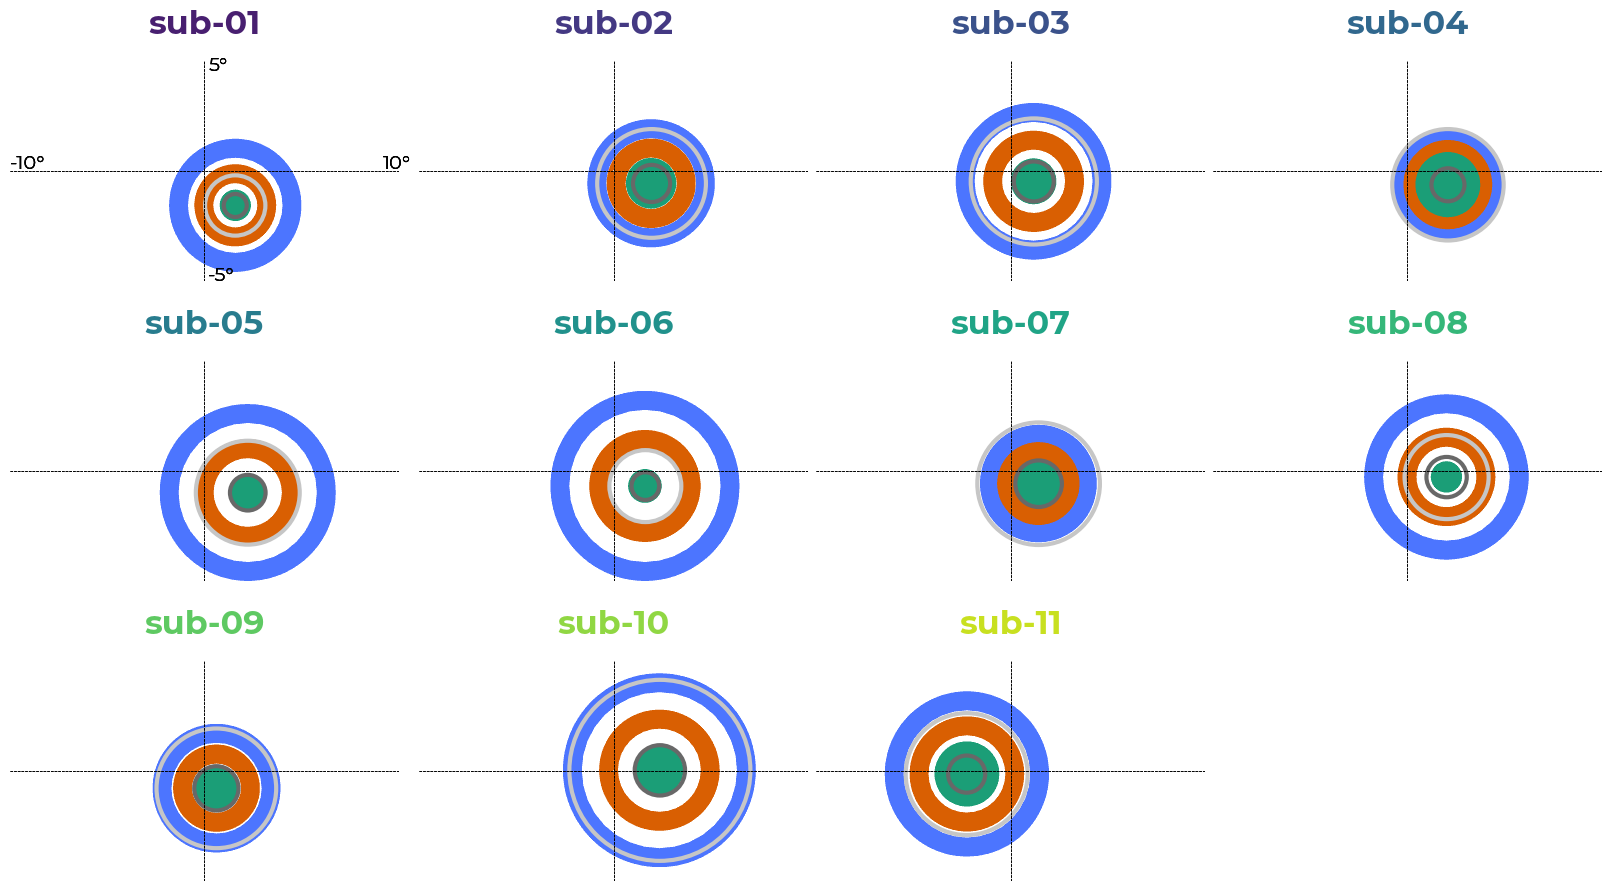

In [94]:
%matplotlib inline
ncols = 4
nrows = int(np.ceil(len(include_subjs)/ncols))

fig,axs = plt.subplots(
    figsize=(4*ncols,3*nrows), 
    ncols=ncols,
    nrows=nrows,
    constrained_layout=True
)

objs = {}
cm = sns.color_palette("viridis", len(include_subjs))
for ix,ax in enumerate(axs.flatten()):

    annot = False
    if ix == 0:
        annot = True

    if (ix+1)>len(include_subjs):
        # remove obsolete axes
        ax.remove()
    else:
        sub = f"sub-{include_subjs[ix]}"
        print(f"plotting '{sub}'")
        png_obj = hr.viz.StimPNGs(sub, n_pix=270)   
        png_obj.generate_composite(
            axs=ax, 
            annotate=annot, 
            title={
                "title": f"sub-{str(ix+1).zfill(2)}", 
                "fontweight": "bold",
                "color": cm[ix]
            },
            add_prf=True
        )

        objs[sub] = png_obj

hr.viz._save_figure(
    fig, 
    fname="group_desc-subject_stims", 
    overwrite=True
)

### Stimulus configurations (original)

plotting 'sub-001'
plotting 'sub-002'
plotting 'sub-005'
plotting 'sub-006'
plotting 'sub-008'
plotting 'sub-010'
plotting 'sub-011'
plotting 'sub-013'
plotting 'sub-014'
plotting 'sub-015'
plotting 'sub-022'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims4.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims4.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-composite_stims4.svg'


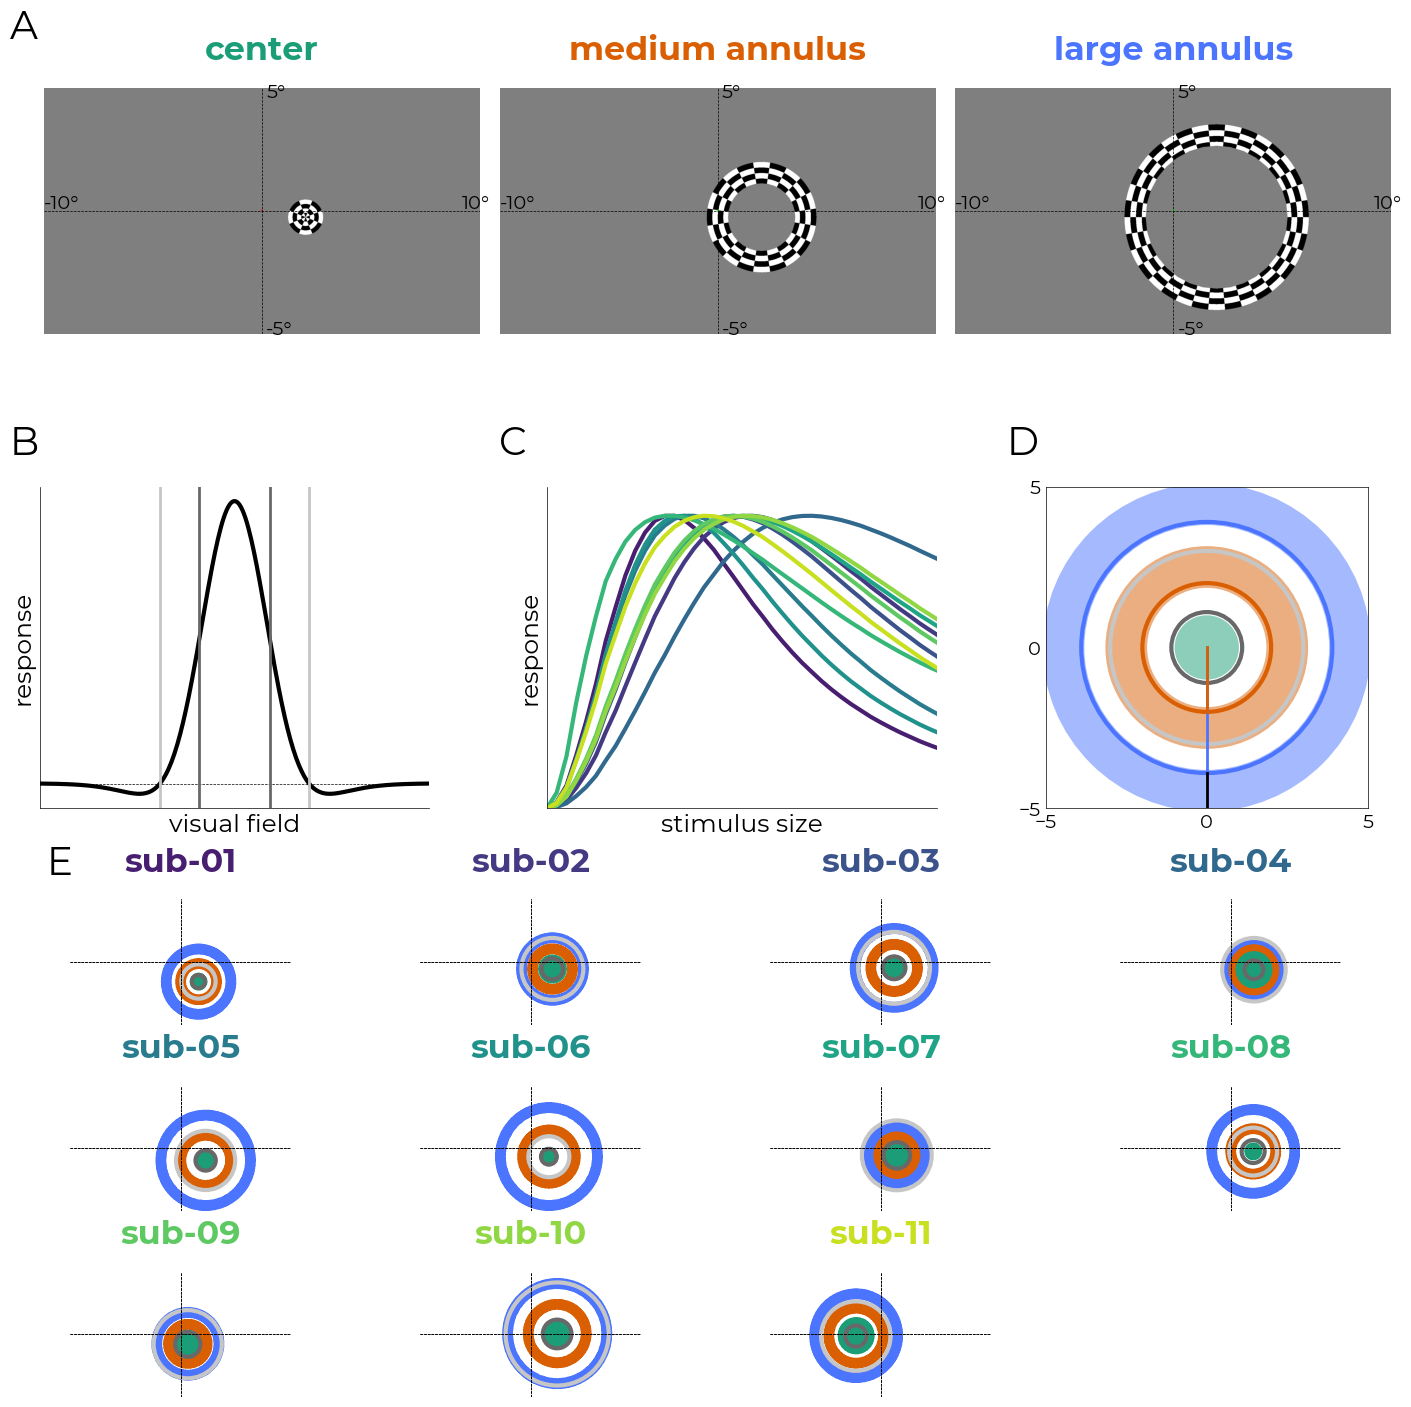

In [19]:
%matplotlib inline
ncols = 4
nrows = int(np.ceil(len(include_subjs)/ncols))

fig = plt.figure(figsize=(14,14), constrained_layout=True)
sfs = fig.subfigures(nrows=3, height_ratios=[0.3,0.3,0.4], hspace=0)
sf1 = sfs[0].subplots(ncols=3)

ref_subj = "sub-013"
scr_obj = hr.viz.StimPNGs(ref_subj)
scr_obj.generate_screen_images(
    axs=sf1, 
    annotate=True
)

axs = sfs[1].subplots(
    ncols=3, 
    gridspec_kw={"wspace": 0.15}
)

prof1d = hr.viz.StimPNGs.get_1d_profile(
    scr_obj.h_pars,
    n_pix=270
)

prof = prof1d.prof_1d.squeeze()
prof /= prof.max()
rf_cm = sns.color_palette("Greys_r", 2)
pl = plotting.LazyPlot(
    prof,
    line_width=3,
    color="k",
    axs=axs[0],
    add_hline=0,
    add_vline={
        "pos": prof1d.zero_cross_pix+[prof1d.metrics.iloc[0].fwhm_obj.t0_,prof1d.metrics.iloc[0].fwhm_obj.t1_],
        "color": [rf_cm[1],rf_cm[1],rf_cm[0],rf_cm[0]],
        "ls": "solid",
        "lw": 2
    },
    x_label="visual field",
    y_label="response",
    # y_lim=[0,prof.max()*1.1],
    x_ticks=[],
    y_ticks=[]
)

cm = sns.color_palette("viridis", len(include_subjs))
for ix,i in enumerate(include_subjs):
    sub = f"sub-{i}"
    obj = hr.viz.StimPNGs(sub, n_pix=None)
    obj.plot_srf(
        axs=axs[1],
        annot=False,
        labels=True,
        normalize=True,
        color=cm[ix]
    )

hr.viz.ExampleStims(axs=axs[-1])

sf3 = sfs[2].subplots(ncols=ncols, nrows=nrows)
objs = {}
for ix,ax in enumerate(sf3.flatten()):

    if (ix+1)>len(include_subjs):
        # remove obsolete axes
        ax.remove()
    else:
        sub = f"sub-{include_subjs[ix]}"
        print(f"plotting '{sub}'")
        png_obj = hr.viz.StimPNGs(sub, n_pix=270)   
        png_obj.generate_composite(
            axs=ax, 
            annotate=False, 
            title={
                "title": f"sub-{str(ix+1).zfill(2)}", 
                "fontweight": "bold",
                "color": cm[ix]
            },
            add_prf=True
        )

        objs[sub] = png_obj

plotting.fig_annot(
    fig,
    axs=[
        fig.axes[0],
        fig.axes[3],
        fig.axes[4],
        fig.axes[5],
        fig.axes[6]
    ],
    x0_corr=-0.25,
    x_corr=[-0.25,-0.4,-0.4,-0.25],
    y=[1.2,1.1,1.1,1.1,1.2]
)

hr.viz._save_figure(
    fig, 
    fname="group_desc-composite_stims4", 
    overwrite=True
)

In [8]:
# png_obj = hr.viz.StimPNGs(sub, n_pix=None)   
# png_obj.generate_composite(
#     # axs=ax, 
#     annotate=False, 
#     title={
#         "title": f"sub-{str(ix+1).zfill(2)}", 
#         "fontweight": "bold",
#         "color": "k"
#     },
#     add_prf=True,
# )

### Epoching method & targeting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


{'vmin': -4.5, 'vmax': 4.5}
{'cm_nr': 3, 'vmin': -4.5, 'vmax': 4.5, 'axs': <Axes: label='<colorbar>'>}
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/fig_desc-method_targeting.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/fig_desc-method_targeting.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/fig_desc-method_targeting.svg'


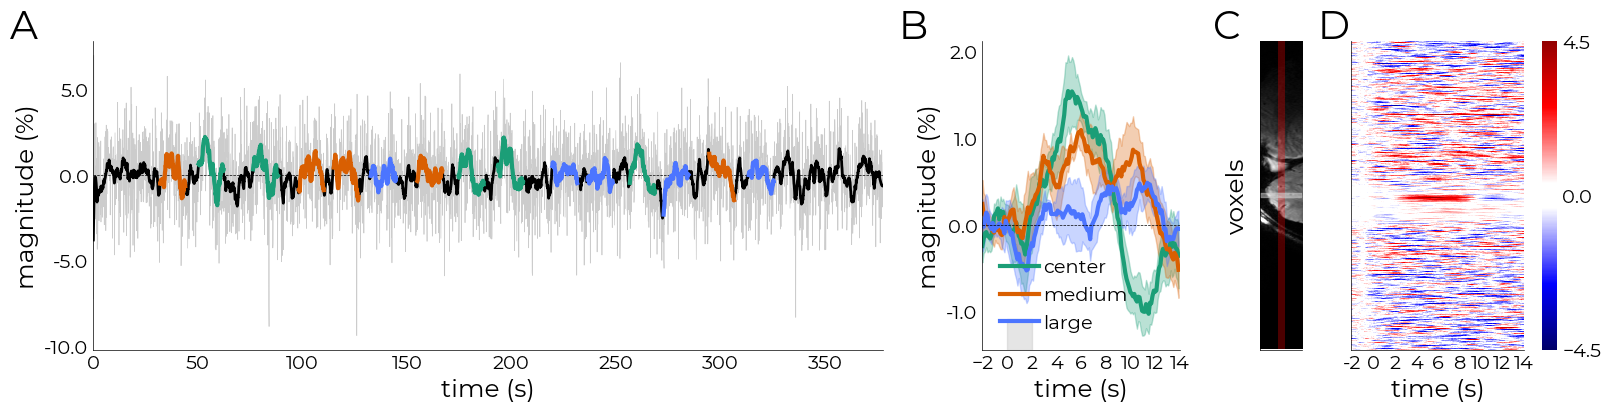

In [167]:
%matplotlib inline
subj = "sub-013"
fig = plt.figure(
    figsize=(16,4),
    constrained_layout=True
)

sfs = fig.subfigures(ncols=2, width_ratios=[0.75,0.25])
ep_fig = hr.viz.EpochMethod(
    utils.get_file_from_substring([subj], h5_files),
    data_kws={
        "compartments": 20,
        "lp_kw": {
            "window_length": 31
        },
        "lp": True,
        "unique_ribbon": True
    },
    TR=0.105,
    interval=[-2,14],
    plot_kws={
        "y_dec": 1,
        "labels": [
            "center", 
            "medium", 
            "large"
        ]
    },
    axs=sfs[0],
    add_titles=False
)

axs = sfs[1].subplots(
    ncols=2,
    sharey=True,
    width_ratios=[0.25,0.8],
    gridspec_kw={
        "wspace": -0.9
    }
)

imgs = {}
ref_slc = subj_obj.get_slc(subj)
ref_beam = subj_obj.get_beam(subj)
for img,ff in zip(["slice","beam"],[ref_slc,ref_beam]):

    if isinstance(ff, str):
        imgs[img] = nb.load(ff).get_fdata().squeeze()
    else:
        raise TypeError(f"{ff} is of type {type(ff)}. Must be a string pointing to a path")

for cm,cr,key,alpha,v in zip(
    ["Greys_r","r"],
    [False,True],
    list(imgs.keys()),
    [None,0.3],
    [2500,1],
    ):
    
    if cr:
        cm = utils.make_binary_cm(cm)

    im = axs[0].imshow(
        imgs[key][:,310:410],
        cmap=cm,
        alpha=alpha,
        vmax=v
    )

plotting.conform_ax_to_obj(
    ax=axs[0],
    x_ticks=[],
    y_label="voxels",
    y_ticks=np.linspace(0,imgs[key].shape[1],5, dtype=int),
    y_ticklabels=[str(int(i)) for i in np.linspace(0,imgs[key].shape[1],5, dtype=int)[::-1]],
    y_lim=[0,imgs[key].shape[0]],
    trim_bottom=True
)

crit = subj_obj.get_slc_criteria(subj)
rib_dict = subj_obj.has_ribdict(subj)
if rib_dict:
    rib_ddict = subj_obj.get(subj, "rib_dict")
    ribbon = rib_ddict[crit[0].split('-')[-1]][crit[1]]
else:
    ribbon = subj_obj.get_ribbon(subj)

axs[0].axhspan(
    *ribbon, 
    alpha=0.5, 
    color="#cccccc"
)

sub_line = utils.select_from_df(
    line_df, 
    expression=f"subject = {subj.split('-')[-1]}"
).groupby(
    [
        "event_type",
        "t"
    ]
).mean()

# make colormap more white
import matplotlib as mpl
from matplotlib.colors import ListedColormap
white_block = np.full((20,4), (1,1,1,1))
seis = mpl.colormaps["seismic"].resampled(256)
new = seis(np.linspace(0,1,256))

# define center
center = new.shape[0]//2
block_size = white_block.shape[0]//2
start,end = center-block_size,center+block_size

# move gradient to extremes
new[0:start,:] = new[block_size:center,:]
new[end:,:] = new[center:,:][:-block_size]
# insert white block
new[start:end,:] = white_block 
cm1 = ListedColormap(new)
cm1

ref_ev = "act"
xy = hr.viz.XinYuPlot.single_xinyu_plot(
    utils.select_from_df(sub_line, expression=f"event_type = {ref_ev}"),
    axs=axs[-1],
    force_int=True,
    time_dec=0,
    time_ticks=9,
    # y_ticks=[],
    as_depth=False,
    # bsl=20,
    sns_kws={
        "vmin": -4.5,
        "vmax": 4.5
    },
    annot_color="k",
    y_lbl=None,
    contours=False,
    annot=False,
    annot_ribbon=False,
    bsl=20,
    cb_kws={
        "cm_nr": 3
    },
    cm=cm1
)

plotting.fig_annot(
    fig,
    axs=list(fig.axes)[:-1],
    x0_corr=-0.85,
    x_corr=[-0.85,-0.35,-0.2]
)

hr.viz._save_figure(
    fig, 
    fname="fig_desc-method_targeting", 
    overwrite=True,
    exts=["png","pdf","svg"]
)

### Subject-specific profiles averaged across depth

Plotting 001
Plotting 002
Plotting 005
Plotting 006
Plotting 008
Plotting 010
Plotting 011
Plotting 013
Plotting 014
Plotting 015
Plotting 022
Plotting average
Adding insets
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-epochs_subjects_wilcox_holm.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-epochs_subjects_wilcox_holm.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-epochs_subjects_wilcox_holm.svg'


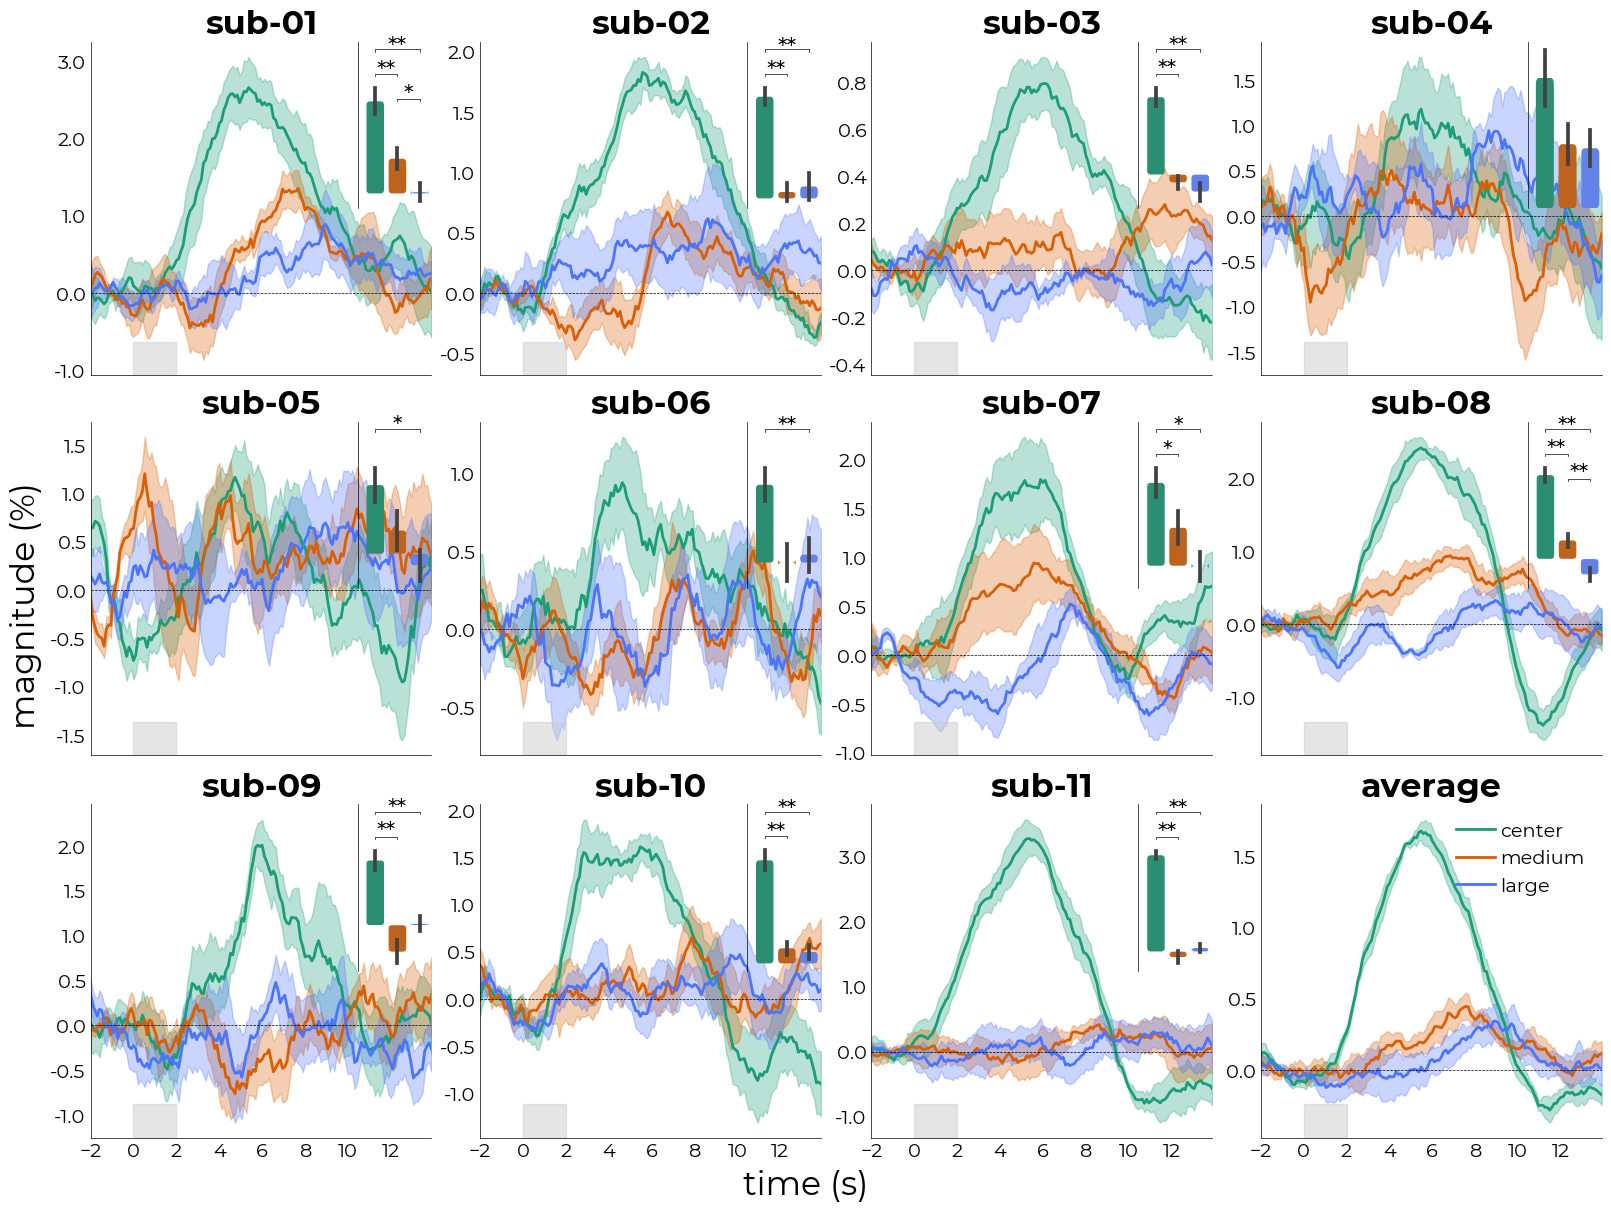

In [281]:
%matplotlib inline

ncols = 4
nrows = int(np.ceil(len(include_subjs)/ncols))
fig,axs = plt.subplots(
    figsize=(ncols*4,nrows*4),
    ncols=ncols,
    nrows=nrows,
    constrained_layout=True,
    sharex=True
)

#----------------------------------------------------------------------------------------------------------------------------------
# Subplots

sub_ax = {}
for ix,ax in enumerate(axs.flatten()):

    if (ix+1)>len(include_subjs):

        print(f"Plotting average")

        grand_avg = pd.concat([utils.select_from_df(sub_df, expression=f"subject = {i}") for i in include_subjs])
        grand_avg = grand_avg.groupby(["event_type","epoch","t"]).mean()
        avg_epoch = hr.viz.PlotEpochProfiles(
            grand_avg["gm"],
            ev_names=["center","medium","large"],
            cm=subj_obj.get_colors(),
            bsl=20,
            axs=ax,
            y_label=None,
            x_label=None            
        )

        ax.set_title(
            "average", 
            fontsize=24, 
            fontweight="bold"
        )

    else:

        sub = include_subjs[ix]
        print(f"Plotting {sub}")
        # print(f"col_nr = {col_nr}; row_nr = {row_nr}")

        select_sub = utils.select_from_df(sub_df, expression=f"subject = {sub}")
        t_ = utils.get_unique_ids(select_sub, id="t")
        sub_gm = utils.select_from_df(select_sub, expression="ribbon", indices=[0])
        avg_epoch = hr.viz.PlotEpochProfiles(
            sub_gm.groupby(["subject","event_type", "epoch","t"]).mean(),
            axs=ax,
            ev_names=["center","near","far"],
            cm=subj_obj.get_colors(),
            bsl=20,
            x_ticks=np.arange(t_[0],t_[-1]*1.1, step=2),
            y_dec=1,
            labels=None,
            y_label=None,
            x_label=None
        )
        
        sub_name = f"sub-{str(ix+1).zfill(2)}"
        # sub_name = f"sub-{sub}"
        ax.set_title(
            sub_name, 
            fontsize=24, 
            fontweight="bold"
        )

        sub_ax[sub] = ax.inset_axes([0.8,0.5,0.2,0.5])

# add barplots as insets
print("Adding insets")
sub_excl = []
for i in include_subjs:
    sub_excl.append(utils.select_from_df(sub_df, expression=f"subject = {i}"))
sub_excl = pd.concat(sub_excl)

tm = hr.viz.MagnitudePerEvent(
    hr.data.melt_epochs(sub_excl), # use average of order-specific runs (usually 2 for each subj, so 2x5 averages = 10 points)
    # add_points=True,
    interval="custom",
    points_color="k",
    y_dec=1,
    palette=subj_obj.get_colors(),
    sns_offset=4,
    add_title=False,
    as_index=True,
    fancy=True,
    # posth=False,
    axs=sub_ax,
    ticks=[],
    plot_kws={
        "y_pos": 1.25,
        "line_separate_factor": -0.2,
        "ast_frac": -0.05
    },
    parametric=False,
    posthoc_kw={
        "effsize": "cohen",
        "paired": True,
        "padjust": "holm"
    }    
)

fig.supylabel("magnitude (%)", fontsize=24)
fig.supxlabel("time (s)", fontsize=24)
hr.viz._save_figure(
    fig, 
    fname="group_desc-epochs_subjects_wilcox_holm", 
    overwrite=True
)

In [315]:
max_file = opj(subj_obj.repo_dir,"data","t_max.csv")
if not os.path.exists(max_file):
    print(f"Writing to '{max_file}'")
    tm.max_df.to_csv(max_file)
    max_data = tm.max_df.copy()
else:
    print(f"Reading '{max_file}'")
    max_data = pd.read_csv(max_file)

try:
    max_data = max_data.reset_index()
except:
    pass

Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/data/t_max.csv'


In [316]:
import statsmodels.formula.api as smf

# Fit the mixed-effects model: testing whether `gm` differs across `event_type` with `subject` as random effects
model = smf.mixedlm(
    "gm ~ event_type", 
    max_data, 
    groups=max_data["subject"]
)
result = model.fit()

# Display the summary of the model results
print(result.summary())
print(result.summary().as_latex())



              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    gm       
No. Observations:     330        Method:                REML     
No. Groups:           11         Scale:                 0.4186   
Min. group size:      30         Log-Likelihood:        -336.6259
Max. group size:      30         Converged:             Yes      
Mean group size:      30.0                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              1.478    0.094  15.770 0.000  1.294  1.662
event_type[T.suppr_1] -1.218    0.087 -13.961 0.000 -1.389 -1.047
event_type[T.suppr_2] -1.361    0.087 -15.604 0.000 -1.532 -1.190
Group Var              0.055    0.048                            

\begin{table}
\caption{Mixed Linear Model Regression Results}
\label{}
\begin{center}
\be

In [318]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Perform pairwise comparisons between event types using Tukey's HSD
pairwise_results = pairwise_tukeyhsd(max_data['gm'], max_data['event_type'])

# Display the results
pairwise_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

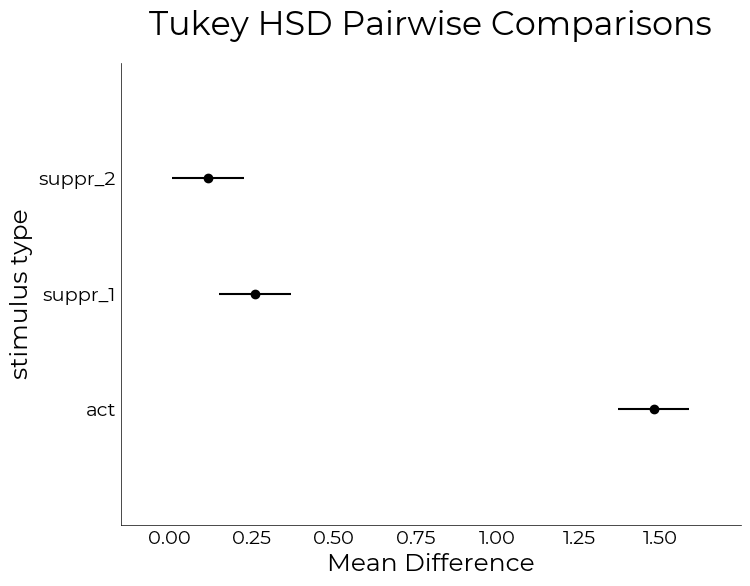

In [319]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot the Tukey HSD results
fig = pairwise_results.plot_simultaneous(figsize=(8, 6))
pl = plotting.conform_ax_to_obj(
    ax=fig.axes[0],
    title="Tukey HSD Pairwise Comparisons",
    x_label="Mean Difference",
    y_label="stimulus type"

)

### GLMs

In [8]:
all_profiles = pd.read_csv(opj(subj_obj.repo_dir,"data","camel_profiles.csv")).set_index(["preproc","method","event_type","subject"])
corr_df = utils.multiselect_from_df(all_profiles, expression=["preproc = corr", "method = norm"])
corr_df.head()

0         1         2         3  \
preproc method event_type subject                                           
corr    norm   center     1        3.060355  3.061141  2.894289  2.879197   
                          2        2.500304  2.677791  2.157537  1.789043   
                          5        2.560171  2.688448  2.087187  1.684478   
                          6        1.872767  1.987979  1.641197  1.446175   
                          8        4.006025  3.704616  1.457791  1.462933   

                                          4         5         6         7  \
preproc method event_type subject                                           
corr    norm   center     1        2.551745  2.104351  1.710303  1.430959   
                          2        1.707960  1.706860  1.664601  1.453538   
                          5        1.574658  1.468655  1.415332  1.330188   
                          6        1.345055  1.376033  1.410550  1.575778   
                          8        2.144702  2.565174  2.803092  1.907660   

                                          8         9        10        11  \
preproc method event_type subject                                           
corr    norm   center     1        1.231197  1.036637  0.735894  0.396898   
                          2        1.322055  1.314591  1.240550  1.075714   
                          5        1.387531  1.497411  1.387390  1.079560   
                          6        2.118351  2.689265  2.450160  1.423128   
                          8        1.304620  1.185943  1.134948  1.173725   

                                         12        13        14        15  \
preproc method event_type subject                                           
corr    norm   center     1        0.175791  0.025364  0.090384  0.219194   
                          2        0.871139  0.737245  0.616034  0.491024   
                          5        0.820054  0.747745  0.728581  0.515458   
                          6        0.399607 -0.020895 -0.080290 -0.125923   
                          8        0.862171  0.456169  0.237556  0.035150   

                                         16        17        18        19  
preproc method event_type subject                                          
corr    norm   center     1        0.283272  0.251463  0.290808  0.281383  
                          2        0.362549  0.321986  0.352576  0.347528  
                          5        0.280199  0.363581  0.575465  0.518532  
                          6        0.238506  0.752707  1.338061  0.872411  
                          8       -0.542628 -0.838401 -0.212659 -0.137964

#### Time lag analysis

In [263]:
comp_avg = comp_excl.groupby(["subject","event_type","t"]).mean()
sub22 = utils.multiselect_from_df(comp_avg, expression=['subject = 022', "event_type = suppr_2"])
sub22

0         1         2         3  \
subject event_type t                                                    
022     suppr_2    -2.000000  -0.492783 -0.465067 -0.465067 -0.492783   
                   -1.894737  -0.464917 -0.436689 -0.436689 -0.464917   
                   -1.789474  -0.519186 -0.529466 -0.529466 -0.519186   
                   -1.684211  -0.536110 -0.534529 -0.534529 -0.536110   
                   -1.578947  -0.418027 -0.415309 -0.415309 -0.418027   
...                                 ...       ...       ...       ...   
                    13.473684  0.345925  0.291941  0.291941  0.345925   
                    13.578947  0.427001  0.439196  0.439196  0.427001   
                    13.684211  0.580984  0.561903  0.561903  0.580984   
                    13.789474  0.466700  0.465432  0.465432  0.466700   
                    13.894737  0.299252  0.268744  0.268744  0.299252   

                                      4         5         6         7  \
subject event_type t                                                    
022     suppr_2    -2.000000  -0.520500 -0.548217 -0.432198 -0.172443   
                   -1.894737  -0.493145 -0.521373 -0.393347 -0.109066   
                   -1.789474  -0.508906 -0.498626 -0.343840 -0.044547   
                   -1.684211  -0.537690 -0.539271 -0.376573 -0.049597   
                   -1.578947  -0.420746 -0.423465 -0.293381 -0.030495   
...                                 ...       ...       ...       ...   
                    13.473684  0.399910  0.453894  0.391637  0.213138   
                    13.578947  0.414806  0.402611  0.340297  0.227862   
                    13.684211  0.600065  0.619146  0.528050  0.326778   
                    13.789474  0.467968  0.469235  0.380208  0.200886   
                    13.894737  0.329761  0.360269  0.273476  0.069382   

                                      8         9        10        11  \
subject event_type t                                                    
022     suppr_2    -2.000000   0.087312  0.347067  0.419923  0.305880   
                   -1.894737   0.175215  0.459496  0.532818  0.395181   
                   -1.789474   0.254746  0.554040  0.618171  0.447140   
                   -1.684211   0.277378  0.604354  0.669007  0.471337   
                   -1.578947   0.232391  0.495277  0.535091  0.351832   
...                                 ...       ...       ...       ...   
                    13.473684  0.034640 -0.143859 -0.181381 -0.077926   
                    13.578947  0.115427  0.002993 -0.007818  0.082995   
                    13.684211  0.125505 -0.075767 -0.107853  0.029248   
                    13.789474  0.021563 -0.157759 -0.173158 -0.024634   
                    13.894737 -0.134711 -0.338805 -0.351101 -0.171598   

                                     12        13        14        15  \
subject event_type t                                                    
022     suppr_2    -2.000000   0.191838  0.077795  0.070988  0.171417   
                   -1.894737   0.257543  0.119906  0.110595  0.229612   
                   -1.789474   0.276110  0.105080  0.078700  0.196971   
                   -1.684211   0.273667  0.075997  0.049917  0.195429   
                   -1.578947   0.168573 -0.014686 -0.024241  0.139906   
...                                 ...       ...       ...       ...   
                    13.473684  0.025529  0.128984  0.104648 -0.047479   
                    13.578947  0.173808  0.264621  0.213136  0.019353   
                    13.684211  0.166349  0.303450  0.284931  0.110793   
                    13.789474  0.123890  0.272414  0.266247  0.105387   
                    13.894737  0.007904  0.187407  0.237063  0.156872   

                                     16        17        18        19  
subject event_type t                                                   
022     suppr_2    -2.000000   0.271845  0.372274  0.372274  0.271845  
                   -1.

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

def time_lag_analysis(data, TR, ref_depth=None):
    """
    Perform time lag analysis across cortical depths to estimate venous drainage effects.

    Parameters:
    - data: np.ndarray, shape (depth, time)
        BOLD signal across cortical depths.
    - TR: float
        Repetition time (in seconds) of the fMRI data.
    - ref_depth: int or None
        Index of the reference depth for cross-correlation. If None, uses the mean signal across depths.

    Returns:
    - lags: np.ndarray, shape (depth,)
        Estimated time lags for each depth (in seconds).
    """
    n_depths, n_timepoints = data.shape

    # Determine the reference signal
    if ref_depth is None:
        ref_signal = np.mean(data, axis=0)  # Mean signal across depths
    else:
        ref_signal = data[ref_depth, :]  # Signal at the specified reference depth

    # Normalize the reference signal
    ref_signal = (ref_signal - np.mean(ref_signal)) / np.std(ref_signal)

    # Compute lags for each depth
    lags = np.zeros(n_depths)
    for depth in range(n_depths):
        signal = data[depth, :]
        signal = (signal - np.mean(signal)) / np.std(signal)  # Normalize the signal
        corr = correlate(signal, ref_signal, mode='full')  # Cross-correlation
        lag_idx = np.argmax(corr) - (len(corr) // 2)  # Lag index
        lags[depth] = lag_idx * TR  # Convert lag index to seconds

    return lags

In [296]:
TR = 0.105  # Repetition time in seconds    

# Example Data
np.random.seed(42)

n_subjects = utils.get_unique_ids(comp_avg, id="subject")
df_lags = []
for sub in n_subjects:

    df = utils.select_from_df(comp_avg, expression=f"subject = {sub}")
    evs = utils.get_unique_ids(df, id="event_type")
    for ev in evs:
        ev_df = utils.select_from_df(df, expression=f"event_type = {ev}")

        # Perform time lag analysis
        lags = time_lag_analysis(ev_df.values.T, TR, ref_depth=None)
        tmp = pd.DataFrame(lags[np.newaxis,...])
        tmp["subject"],tmp["event_type"] = sub,ev
        df_lags.append(tmp)

df_lags = pd.concat(df_lags)
df_lags.set_index(["subject","event_type"], inplace=True)
df_lags.head()

0      1      2      3      4      5      6      7  \
subject event_type                                                          
001     act         0.00  0.105  0.000  0.000  0.000  0.000  0.000  0.000   
        suppr_1     0.21  0.210  0.210  0.210  0.105  0.000 -0.840 -0.735   
        suppr_2     0.21  0.525  0.105 -1.680 -1.680  0.735  1.365  1.680   
002     act         0.00  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
        suppr_1     0.00 -0.105  0.000  0.315  0.420  0.315  0.210  0.000   

                       8     9     10    11   12     13     14   15     16  \
subject event_type                                                           
001     act         0.00  0.00  0.000  0.00  0.0  0.735  0.000  0.0  0.000   
        suppr_1    -0.63 -0.42  0.000  1.89  0.0 -0.105  0.000  0.0  3.885   
        suppr_2    -0.21 -0.42 -0.735 -0.84 -2.1 -2.835 -2.835  0.0  0.000   
002     act         0.00  0.00  0.000  0.00  0.0  0.000  0.000  0.0 -0.210   
        suppr_1    -0.42 -0.21  0.000  0.00  0.0 -0.735 -0.735  0.0  0.000   

                       17     18     19  
subject event_type                       
001     act         0.000  0.000  0.000  
        suppr_1     0.105  0.105  0.105  
        suppr_2     0.105  0.420  0.210  
002     act         0.000  0.000  0.000  
        suppr_1     0.000  2.730  2.730

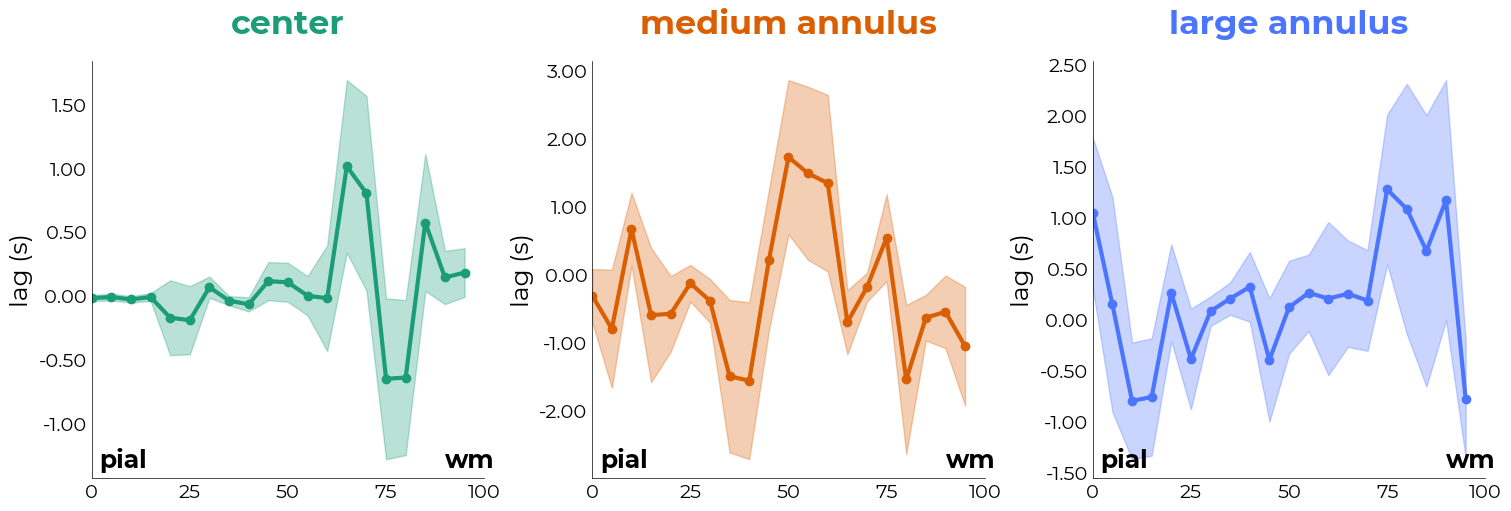

In [297]:
fig,axs = plt.subplots(ncols=len(evs), figsize=(len(evs)*5,5), constrained_layout=True)

for ix,ev in enumerate(evs):
    ev_lags = utils.select_from_df(df_lags, expression=f"event_type = {ev}")

    tick_dict = hr.viz.make_wm_pial_ticks(ev_lags.mean().values)
    pl = plotting.LazyPlot(
        ev_lags.mean().values.squeeze(),
        axs=axs[ix],
        line_width=3,
        error=ev_lags.sem().values.squeeze(),
        markers=["o"],
        color=subj_obj.ev_colors[ix],
        x_ticks=tick_dict["ticks"],
        x_ticklabels=tick_dict["labels"],
        title={
            "title": subj_obj.ev_names[ix].replace("\n"," "),
            "color": subj_obj.ev_colors[ix],
            "fontweight": "bold"
        },
        y_label="lag (s)",
        y_dec=2
    )

    hr.viz.annotate_cortical_ribbon(
        pl.axs,
        pial_pos=(0.02,0.025),
        wm_pos=(0.9,0.025),
        fontsize=pl.font_size,
        fontweight="bold"
    )

#### Markuerkiaga 2016 model

[]

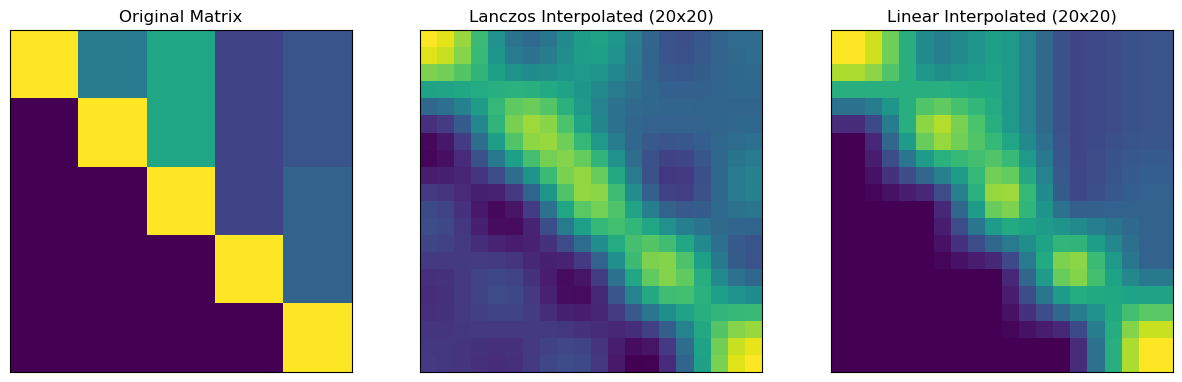

In [14]:
%matplotlib inline

# interpolation
matrix = hr.utils.get_vascular_weights()
linear_resampled_matrix = hr.utils.get_vascular_weights(factor=20, interpolation=cv2.INTER_LINEAR)
lanczos_resampled_matrix = hr.utils.get_vascular_weights(factor=20)

# Plotting the matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original matrix
axes[0].imshow(matrix, cmap="viridis", interpolation="none")
axes[0].set_title("Original Matrix")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Lanczos interpolated matrix using OpenCV
axes[1].imshow(lanczos_resampled_matrix, cmap="viridis", interpolation="none")
axes[1].set_title("Lanczos Interpolated (20x20)")
axes[1].set_xticks([])
axes[1].set_yticks([])

# Linearly interpolated matrix
axes[2].imshow(linear_resampled_matrix, cmap="viridis", interpolation="none")
axes[2].set_title("Linear Interpolated (20x20)")
axes[2].set_xticks([])
axes[2].set_yticks([])

In [15]:
def ridge_regression(X, Y, lam):
    """
    Perform ridge regression to compute beta coefficients.
    
    Parameters:
    - X: 2D numpy array of predictors (design matrix).
    - Y: 2D numpy array of responses (target values).
    - lam: Regularization parameter (lambda).
    
    Returns:
    - beta: Coefficients for the ridge regression.
    """
    # Add lambda * I to the normal equation
    identity = np.eye(X.shape[1])  # Identity matrix of appropriate size
    ridge_term = lam * identity
    beta = np.linalg.inv(X.T @ X + ridge_term) @ X.T @ Y
    return beta

In [17]:
if corr_df.shape[1]<lanczos_resampled_matrix.shape[1]:
    X = matrix.copy()
else:
    X = lanczos_resampled_matrix.copy()

X = lanczos_resampled_matrix.copy()
evs = utils.get_unique_ids(corr_df, id="event_type", sort=False)
marq_df = []
for ev in evs:
    df = utils.select_from_df(corr_df, expression=f"event_type = {ev}")

    Y = df.values.T
    
    betas, sse, rank, s = np.linalg.lstsq(X, Y, rcond=1e-5)
    # betas_inv = np.linalg.inv(X.T @ X) @ X.T @ Y
    marq = pd.DataFrame(betas.T)
    # marq = pd.DataFrame(ridge_regression(X, Y, 1).T)
    marq.index = df.index
    marq_df.append(marq)

marq_df = pd.concat(marq_df)
marq_df.head()

0         1         2         3   \
preproc method event_type subject                                           
corr    norm   center     1        0.504730  0.499865  0.480679  0.450014   
                          2        0.353660  0.339883  0.299387  0.242005   
                          5        0.392889  0.369820  0.302846  0.207625   
                          6        0.257094  0.217928  0.106153 -0.045281   
                          8        0.424749  0.414387  0.382858  0.340318   

                                         4         5         6         7   \
preproc method event_type subject                                           
corr    norm   center     1        0.412744  0.373662  0.336267  0.302381   
                          2        0.187131  0.155525  0.159967  0.197876   
                          5        0.117137  0.067551  0.081168  0.152314   
                          6       -0.164638 -0.174699 -0.037374  0.211073   
                          8        0.302101  0.282420  0.288837  0.319490   

                                         8         9         10        11  \
preproc method event_type subject                                           
corr    norm   center     1        0.266065  0.219067  0.158882  0.093790   
                          2        0.249019  0.286428  0.289726  0.256245   
                          5        0.246117  0.317088  0.331187  0.283802   
                          6        0.471073  0.626187  0.598723  0.395199   
                          8        0.357123  0.377899  0.363438  0.312146   

                                         12        13        14        15  \
preproc method event_type subject                                           
corr    norm   center     1        0.035095 -0.005139 -0.017658 -0.000899   
                          2        0.198730  0.137872  0.093119  0.074705   
                          5        0.198293  0.111935  0.058095  0.051109   
                          6        0.106159 -0.142713 -0.249589 -0.186354   
                          8        0.232958  0.140808  0.052775 -0.015789   

                                         16        17        18        19  
preproc method event_type subject                                          
corr    norm   center     1        0.033249  0.068465  0.092376  0.101826  
                          2        0.077988  0.090580  0.101196  0.105362  
                          5        0.079901  0.120338  0.150481  0.161188  
                          6       -0.004418  0.204165  0.354722  0.407554  
                          8       -0.062044 -0.090452 -0.105697 -0.109373

model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model #3 ('double_bump_deriv'); skipping index: 2
model #4 ('double_bump_deriv_macro'); skipping index: 2
model #5 ('double_bump_deriv_micro'); skipping index: 2
model #6 ('double_bump_deriv_vascular'); skipping index: 3
model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model #3 ('double_bump_deriv'); skipping index: 2
model #4 ('double_bump_deriv_macro'); skipping index: 2
model #5 ('double_bump_deriv_micro'); skipping index: 2
model #6 ('double_bump_deriv_vascular'); skipping index: 3
model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model #3 ('double_bump_deriv'); skipping index: 2
model #4 ('double_bump_deriv_macro'); skipping index: 2
model #5 ('double_bump_deriv_micro'); skipping index: 2
model #6 ('double_bump_deriv_vascular'); skipping index: 3
model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model

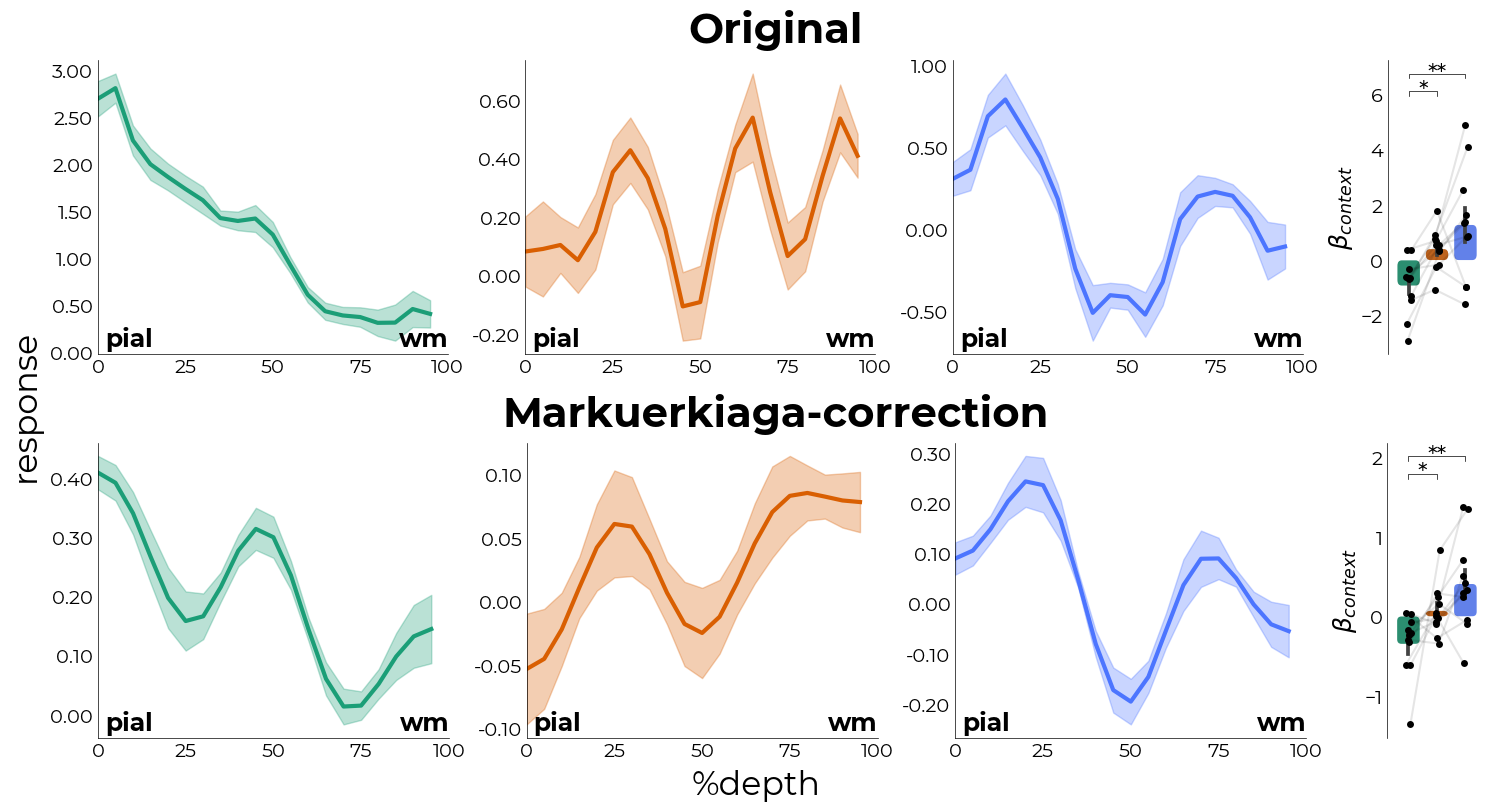

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(5*len(evs),8), constrained_layout=True)
sf = fig.subfigures(nrows=2)

# run all the models given dataframe
res_orig = hr.utils.run_models(corr_df)
res_marq = hr.utils.run_models(marq_df)
model = "double_bump_deriv"

model_lbls = {
    "linear": "linear",
    "camel": "double",
    "double_bump_deriv": "double bump",
    "double_bump_deriv_micro": "micro",
    "double_bump_deriv_macro": "macro",
    "double_bump_deriv_vascular": "vascular"
}

incl_models = [
    "double_bump_deriv",
    "double_bump_deriv_micro",
    "double_bump_deriv_macro",
    "double_bump_deriv_vascular"
]
for iix,(t,df) in enumerate(zip(["Original", "Markuerkiaga-correction"],[corr_df,marq_df])):

    sff = sf[iix]
    subplots = sff.subplots(ncols=len(evs)+1, width_ratios=[0.3,0.3,0.3,0.075])
    res = hr.utils.run_models(df)
    
    evs = utils.get_unique_ids(df, id="event_type", sort=False)
    for ix,ev in enumerate(evs):
        
        ev_name = ev.replace("\n", " ")
        tmp_df = utils.select_from_df(df, expression=f"event_type = {ev}")
        avg = tmp_df.mean(axis=0).values
        err = tmp_df.sem(axis=0).values

        ddict = hr.viz.make_wm_pial_ticks(avg)
        pl = plotting.LazyPlot(
            avg,
            axs=subplots[ix],
            line_width=3,
            color=subj_obj.get_colors()[ix],
            error=err,
            x_ticks=ddict["ticks"],
            x_ticklabels=ddict["labels"],
            y_dec=2
        )

        hr.viz.annotate_cortical_ribbon(
            subplots[ix],
            pial_pos=(0.02,0.025),
            wm_pos=(0.86,0.025),
            fontsize=pl.font_size,
            fontweight="bold"
        )

    double_deriv_cf = utils.multiselect_from_df(res["beta_sum"], expression=[f"model = {model}"])
    br = plotting.LazyBar(
        double_deriv_cf,
        x="event_type",
        y="beta",
        # x_label="stimulus type",
        axs=subplots[-1],
        # figsize=(1,5),
        add_points=True,
        points_color="k",
        y_label=r'$\beta_{context}$',
        # add_labels=True,
        sns_offset=4,
        bar_legend=True,
        sns_rot=-25,
        # title={
        #     "title": f"{key} | {vi}",
        #     "fontweight": "bold"
        # },
        bbox_to_anchor=(0.95,1),
        fancy=True,
        palette=subj_obj.ev_colors, #[::2],
        connect=True,
    )

    normality = pg.normality(br.data[br.y])
    # is_normal = normality["normal"][0]
    aov = glm.ANOVA(
        data=br.data,
        dv=br.y,
        between=br.x,
        # test="test",
        parametric=True,
        posthoc_kw={
            "effsize": "cohen",
            "test": "test",
            "paired": True,
            "subject": "subject",
            "padjust": "holm"
        }
    )

    aov.plot_bars( 
        axs=br.ff,
        ast_frac=-0.04,
        y_pos=1.15,
        line_separate_factor=-0.075
    )

    sff.suptitle(t, fontsize=30, fontweight="bold")

fig.supxlabel("%depth", fontsize=24)
fig.supylabel("response", fontsize=24)

hr.viz._save_figure(
    fig, 
    fname="group_desc-profile_vascular_corr", 
    # overwrite=True
)

In [ ]:
prof_pivot = utils.multiselect_from_df(
    all_profiles,
    expression=[
        "preproc = corr",
        "method = norm",
    ]
)
prof_pivot.reset_index(inplace=True)
prof_pivot.drop(["preproc","method"], inplace=True, axis=1)
prof_pivot.set_index(["event_type", "subject"], inplace=True)
reg_df = pd.DataFrame(reg_dict["camel_deriv"], columns=["linear","peak_upper","deriv_upper", "peak_deep", "deriv_deep"])

0         1         2         3         4  \
event_type      subject                                                     
center          1        3.060355  3.061141  2.894289  2.879197  2.551745   
                2        2.500304  2.677791  2.157537  1.789043  1.707960   
                5        2.560171  2.688448  2.087187  1.684478  1.574658   
                6        1.872767  1.987979  1.641197  1.446175  1.345055   
                8        4.006025  3.704616  1.457791  1.462933  2.144702   
                10       2.366752  2.563166  2.121649  1.831891  1.650922   
                11       2.597183  2.714311  2.314777  2.067002  1.852390   
                13       3.285149  3.327475  3.112992  2.994997  2.659564   
                14       1.784546  2.044245  1.765953  1.436228  1.165421   
                15       2.814012  3.045537  2.417208  1.940639  1.679448   
                22       2.821787  3.097480  2.819189  2.473469  2.186667   
medium\nannulus 1        0.416602  0.752350  0.096321 -0.592437 -0.379552   
                2        0.311210  0.423862  0.214025 -0.028539 -0.102935   
                5        0.425775  0.428543  0.442423  0.391427  0.254008   
                6       -0.182407 -0.713318 -0.082077  0.516437  1.040225   
                8       -0.662657 -0.616576 -0.380265 -0.436029 -0.493761   
                10       0.238647  0.300776  0.240137  0.146771  0.186879   
                11      -0.475601 -0.672766 -0.262968  0.114101  0.175903   
                13       0.022362  0.057584 -0.074582 -0.143849  0.339326   
                14       0.634342  0.738920  0.745694  0.619509  0.567635   
                15       0.209713  0.265986  0.168908  0.039102  0.118171   
                22      -0.030026  0.038230  0.045004 -0.044859 -0.060410   
large\nannulus  1        0.554751  0.259209  1.068859  1.766391  1.370508   
                2        0.143341  0.150386  0.354863  0.447222  0.173370   
                5        0.048535  0.061389  0.291303  0.390567  0.258967   
                6        0.755678  0.935152  0.921269  0.795267  0.568289   
                8       -0.139085  0.130581  1.624737  1.850844  1.598760   
                10       0.647069  0.954992  0.791252  0.515394  0.196500   
                11      -0.104431 -0.162899  0.172603  0.395987  0.556362   
                13       0.011537 -0.026178  0.431297  0.732179  0.672480   
                14       0.218731  0.152847  0.316062  0.460717  0.467160   
                15       0.724743  0.878656  0.789396  0.588017  0.358669   
                22       0.547355  0.682965  0.846180  0.789342  0.594292   

                                5         6         7         8         9  \
event_type      subject                                                     
center          1        2.104351  1.710303  1.430959  1.231197  1.036637   
                2        1.706860  1.664601  1.453538  1.322055  1.314591   
                5        1.468655  1.415332  1.330188  1.387531  1.497411   
                6        1.376033  1.410550  1.575778  2.118351  2.689265   
                8        2.565174  2.803092  1.907660  1.304620  1.185943   
                10       1.656633  1.665882  1.642831  1.703702  1.792915   
                11       1.633011  1.499542  1.578472  1.736983  1.484727   
                13       2.327950  1.833004  1.293529  1.131205  1.111671   
                14       0.898431  0.826956  0.912742  1.078110  1.271818   
                15       1.474228  1.291635  1.131596  1.051138  1.082679   
                22       1.903683  1.668453  1.442726  1.296580  1.178774   
medium\nannulus 1        0.162670  0.571167  0.687118  0.764216  0.532294   
                2       -0.092485 -0.105927 -0.082413 -0.097753 -0.029140   
                5        0.170149  0.001052 -0.254294 -0.225190 -0.117515   
                6        1.071109  1.037439  0.816078  0.371080 -0.119693   
                8        0.

In [66]:
dfs.to_csv(opj(subj_obj.repo_dir,"data","norm_corr_profiles_regressors.csv"))

#### Center vs large

In [10]:
reg_dict, c_vecs, skip = hr.utils.generate_double_bump_model(all_profiles.shape[-1])
reg_dict.keys()

dict_keys(['linear', 'double_bump', 'double_bump_deriv', 'double_bump_deriv_macro', 'double_bump_deriv_micro', 'double_bump_deriv_vascular'])

model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model #3 ('double_bump_deriv'); skipping index: 2
model #4 ('double_bump_deriv_macro'); skipping index: 2
model #5 ('double_bump_deriv_micro'); skipping index: 2
model #6 ('double_bump_deriv_vascular'); skipping index: 3
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_stat-beta_double_bump_ev-cf.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_stat-beta_double_bump_ev-cf.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_stat-beta_double_bump_ev-cf.svg'

              W      pval  normal
beta  0.939402  0.192378    True

        Source  ddof1  ddof2          F     p-unc      np2
0  event_type      1     20  10.310854  0.004384  0.34017


Contrast       A               B  Paired  Parametric         T   dof  \
0  event_type  center  large\nannulus    True        True -4.005559  10.0   

  alternative     p-unc   BF10     cohen  distances  
0   two-sided  0.002496  18.86 -1.369197          1

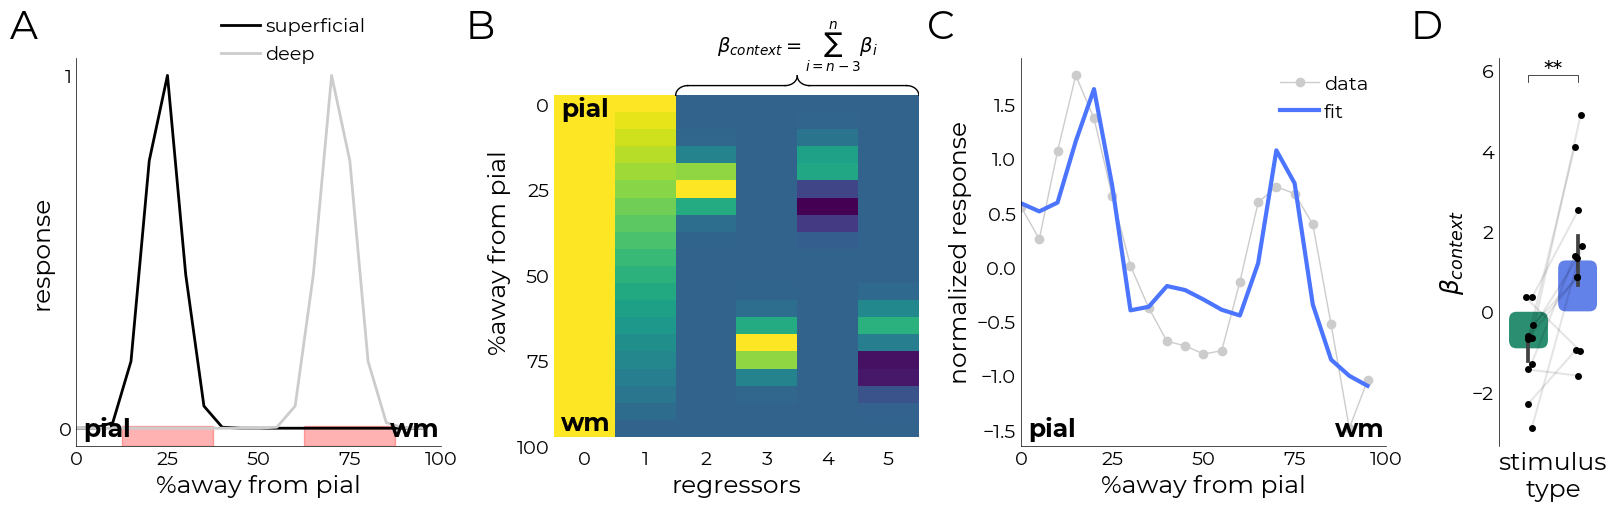

In [29]:
%matplotlib inline

n_elem = all_profiles.shape[1]
colors = sns.color_palette("viridis", n_elem)
ev = "large\nannulus"
model = "double_bump_deriv"
expr = [
    f"event_type = {ev}",
    "method = norm"
]

corr_df = utils.multiselect_from_df(all_profiles, expression=["preproc = corr","method = norm"])
fig,axs = plt.subplots(
    ncols=4, 
    width_ratios=[0.3,0.3,0.3,0.08],
    figsize=(16,5), 
    constrained_layout=True
)

ix = 0
sub_name = f"sub-{str(ix+1).zfill(2)}"

# cm = sns.color_palette("Reds", len(incl_models))
cm = [subj_obj.ev_colors[-1]]

# run all the models given dataframe
res = hr.utils.run_models(corr_df)

# format data list 
data_list = [
    utils.select_from_df(corr_df, expression=expr).values[ix,:],
    utils.multiselect_from_df(res["predictions"], expression=expr+[f"model = double_bump_deriv"]).values[ix,:]
]

ax_example = axs[0]
ax_dm = axs[1]
ax_prof = axs[2]
ddict = hr.viz.make_wm_pial_ticks(data_list[0])
def_dict = {
    "color": ["#cccccc"]+cm,
    "axs": ax_prof,
    "line_width": [1,3],
    "markers": ["o",None],
    "labels": ["data","fit"],
    "x_ticks": ddict["ticks"],
    "x_ticklabels": ddict["labels"],
    "x_label": "%away from pial",
    "y_label": "normalized response",
}

ex = hr.utils.generate_model_example()
pl = plotting.LazyPlot(
    ex[1:],
    axs=ax_example,
    line_width=2,
    color=["k","#cccccc"],
    x_ticks=ddict["ticks"],
    x_ticklabels=ddict["labels"],
    x_label=def_dict["x_label"],
    y_label="response",
    y_ticks=[0,1],
    y_ticklabels=[0,1],
    labels=["superficial","deep"],
    bbox_to_anchor=(0.35,0.94)
)

for loc in [(2.5,7.5),(12.5,17.5)]:
    hr.viz.add_axvspan(
        pl.axs,
        loc=loc,
        color="r",
        ymax=0.05
    )

# design matrix
ax_dm.imshow(
    reg_dict[model], 
    cmap="viridis",
    aspect="auto"
)

# ax_dm.axis("off")

# curly bracket?
# Draw a curly bracket under the last 4 regressors
x_start = 1.5  # Adjust this to the last 4 regressors
x_end = 5.5    # Adjust based on where the regressors end
y_pos = -0.5  # Adjust bracket position
bracket_text_pos = -3  # Text positioning

# Add the equation underneath the bracket
ax_dm.text(
    (x_start + x_end) / 2, 
    bracket_text_pos, 
    r'$\beta_{context}=\sum_{i=n-3}^{n}\beta_i$',
    ha='center', 
    fontsize=14, 
    color='black'
)

k_r2 = 0.05
cb = plotting.curlyBrace(
    fig, 
    ax_dm, 
    (5.5,-0.5), 
    (1.5,-0.5), 
    k_r2, 
    # bool_auto=True, 
    # str_text=str_text, 
    color='k', 
    lw=1, 
    int_line_num=1, 
    # fontdict=font
)

hr.viz.annotate_cortical_ribbon(
    ax_dm,
    pial_pos=(0.02, 0.85),
    wm_pos=(0.02,0.04),
    fontsize=pl.font_size,
    fontweight="bold"
)
ax_dm = plotting.conform_ax_to_obj(
    ax_dm, 
    x_label="regressors", 
    y_label=def_dict["x_label"],
    y_ticks=def_dict["x_ticks"],
    y_ticklabels=def_dict["x_ticklabels"]
)
ax_dm[0].spines['left'].set_visible(False)
ax_dm[0].spines['bottom'].set_visible(False)

# # Adjust axes (if needed)
# ax_dm.set_xlim([0, 10])  # Example x-limits
# ax_dm.set_ylim([-2, 1])  # Example y-limits


pl = plotting.LazyPlot(
    data_list,
    **def_dict
)

for ax in [ax_example,ax_prof]:
    hr.viz.annotate_cortical_ribbon(
        ax,
        pial_pos=(0.02,0.025),
        wm_pos=(0.86,0.025),
        fontsize=pl.font_size,
        fontweight="bold"
    )

stat = "beta"
if stat == "tstat":
    ylbl = "t-stat"
else:
    ylbl = stat

ax_bar = axs[-1]
br = plotting.LazyBar(
    utils.multiselect_from_df(
        res["beta_sum"],
        expression=[
            "preproc = corr",
            "method = norm",
            "event_type != medium\nannulus",
            "model = double_bump_deriv"
        ]
    ),
    x="event_type",
    y=stat,
    x_label="stimulus\ntype",
    axs=ax_bar,
    add_points=True,
    points_color="k",
    y_label=r'$\beta_{context}$',
    sns_offset=4,
    bar_legend=True,
    sns_rot=-25,
    # title={
    #     "title": f"{key} | {vi}",
    #     "fontweight": "bold"
    # },
    # bbox_to_anchor=(0.8,0.9),
    fancy=True,
    palette=subj_obj.ev_colors[::2],
    connect=True
)

normality = pg.normality(br.data[br.y])
is_normal = normality["normal"][0]
aov = glm.ANOVA(
    data=br.data,
    dv=br.y,
    between=br.x,
    # test="test",
    parametric=is_normal,
    posthoc_kw={
        "effsize": "cohen",
        "test": "test",
        "paired": True,
        "subject": "subject",
        "padjust": "hilm"
    }
)

aov.plot_bars( 
    axs=br.ff,
    ast_frac=0,
    y_pos=1.05,
    line_separate_factor=-0.075
)

plotting.fig_annot(
    fig,
    axs=list(fig.axes),
    x0_corr=-0.6,
    x_corr=[-0.8,-0.85,-0.85],
    y=1.05
)

hr.viz._save_figure(
    fig, 
    fname=f"model_stat-beta_double_bump_ev-cf", 
    overwrite=True
)

print("\n", normality)
print("\n", aov.ano)
aov.posthoc

     Contrast               A                B  Paired  Parametric         T  \
0  event_type          center   large\nannulus    True        True -4.005559   
1  event_type          center  medium\nannulus    True        True -3.146138   
2  event_type  large\nannulus  medium\nannulus    True        True  1.330295   

    dof alternative     p-unc    p-corr p-adjust   BF10     cohen  distances  
0  10.0   two-sided  0.002496  0.007488     holm  18.86 -1.369197          2  
1  10.0   two-sided  0.010401  0.020802     holm  5.864 -1.505014          1  
2  10.0   two-sided  0.212961  0.212961     holm  0.603  0.571084          1  
     Contrast               A                B  Paired  Parametric         T  \
0  event_type          center   large\nannulus    True        True -2.936977   
1  event_type          center  medium\nannulus    True        True -0.864261   
2  event_type  large\nannulus  medium\nannulus    True        True  1.655022   

    dof alternative     p-unc    p-corr p-

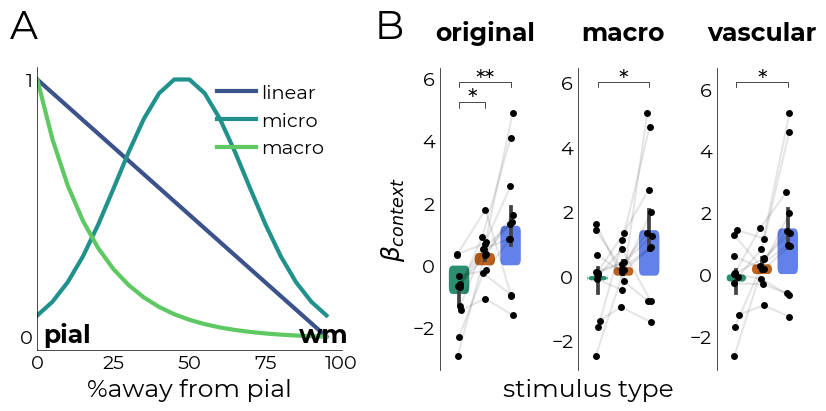

In [81]:
reg_dict, c_vecs, skip = hr.utils.generate_double_bump_model(all_profiles.shape[-1])

lbl = {
    "linear": "linear",
    "camel": "double",
    "double_bump_deriv": "original",
    "double_bump_deriv_micro": "micro",
    "double_bump_deriv_macro": "macro",
    "double_bump_deriv_vascular": "vascular"
}

incl_models = [
    "double_bump_deriv",
    # "double_bump_deriv_micro",
    "double_bump_deriv_macro",
    "double_bump_deriv_vascular"
]

fig = plt.figure(figsize=(8,4), constrained_layout=True)
sf = fig.subfigures(ncols=2, width_ratios=[0.45,0.55])
ax1 = sf[0].subplots()
ax2 = sf[1].subplots(ncols=len(incl_models), gridspec_kw={"wspace": 0.1})

reg_list = [
    reg_dict["linear"][:,1].squeeze(),
    reg_dict["double_bump_deriv_micro"][:,1].squeeze(),
    reg_dict["double_bump_deriv_macro"][:,1].squeeze(),
]

pl = plotting.LazyPlot(
    reg_list,
    axs=ax1,
    line_width=3,
    y_ticks=[0,1],
    y_ticklabels=[0,1],
    labels=[
        "linear",
        "micro",
        "macro"
    ],
    x_ticks=ddict["ticks"],
    x_ticklabels=ddict["labels"],
    x_label="%away from pial",
)

hr.viz.annotate_cortical_ribbon(
    ax1,
    pial_pos=(0.02,0.025),
    wm_pos=(0.86,0.025),
    fontsize=pl.font_size,
    fontweight="bold"
)


for ix,model in enumerate(incl_models):
    double_deriv_cf = utils.multiselect_from_df(res["beta_sum"], expression=[f"model = {model}"])

    if ix == 0:
        y_lbl = r'$\beta_{context}$'
    else:
        y_lbl = None

    br = plotting.LazyBar(
        double_deriv_cf,
        x="event_type",
        y=stat,
        # x_label="stimulus type",
        axs=ax2[ix],
        # figsize=(1,5),
        add_points=True,
        points_color="k",
        y_label=y_lbl,
        # add_labels=True,
        sns_offset=4,
        bar_legend=True,
        sns_rot=-25,
        # title={
        #     "title": f"{key} | {vi}",
        #     "fontweight": "bold"
        # },
        bbox_to_anchor=(0.95,0.1),
        fancy=True,
        palette=subj_obj.ev_colors, #[::2],
        connect=True,
        title={
            "title": lbl[model],
            "fontweight": "bold",
        },
        title_size=pl.font_size
    )

    normality = pg.normality(br.data[br.y])
    # is_normal = normality["normal"][0]
    aov = glm.ANOVA(
        data=br.data,
        dv=br.y,
        between=br.x,
        # test="test",
        parametric=True,
        posthoc_kw={
            "effsize": "cohen",
            "test": "test",
            "paired": True,
            "subject": "subject",
            "padjust": "holm"
        }
    )

    aov.plot_bars( 
        axs=br.ff,
        ast_frac=-0.02,
        y_pos=1.05,
        line_separate_factor=-0.075
    )

    print(aov.posthoc)

leg = pl.axs.get_legend()
pos  = ax2[0].get_position()
# leg.set_bbox_to_anchor((pos.x0+0.16,0.65), transform=fig.transFigure)

plotting.fig_annot(
    fig,
    axs=list(fig.axes[:2]),
    x0_corr=-0.25,
    x_corr=[-0.95],
    y=1.1
)

sf[1].supxlabel("stimulus type", fontsize=pl.font_size)

hr.viz._save_figure(
    fig, 
    fname=f"vascular_model_stat-beta_double_bump_ev-cnf", 
    overwrite=True
)


In [48]:
fig.axes

[<Axes: xlabel='%away from pial'>,
 <Axes: title={'center': 'original'}, ylabel='$\\beta_{context}$'>,
 <Axes: title={'center': 'macro'}>,
 <Axes: title={'center': 'vascular'}>]

model #1 ('linear'); skipping index: 1
model #2 ('double_bump'); skipping index: 2
model #3 ('double_bump_deriv'); skipping index: 2
model #4 ('double_bump_deriv_macro'); skipping index: 2
model #5 ('double_bump_deriv_micro'); skipping index: 2
model #6 ('double_bump_deriv_vascular'); skipping index: 3
     Contrast               A                B  Paired  Parametric         T  \
0  event_type          center   large\nannulus    True        True -4.577580   
1  event_type          center  medium\nannulus    True        True -3.135871   
2  event_type  large\nannulus  medium\nannulus    True        True  1.813401   

    dof alternative     p-unc    p-corr p-adjust    BF10     cohen  distances  
0  10.0   two-sided  0.001014  0.003043     holm  40.005 -1.509275          2  
1  10.0   two-sided  0.010584  0.021168     holm   5.782 -1.154696          1  
2  10.0   two-sided  0.099847  0.099847     holm   1.021  0.719041          1  
     Contrast               A                B  Paired 

Text(0.5, 0.98, 'Markuerkiaga corrected + regressors')

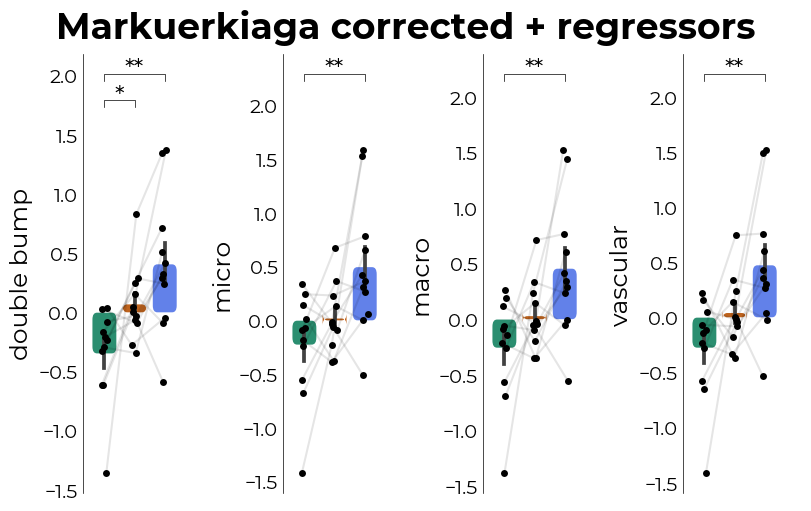

In [333]:
# run all the models given dataframe
res_marq = hr.utils.run_models(marq_df)

fig,axs = plt.subplots(ncols=len(incl_models), figsize=(2*len(incl_models),5), constrained_layout=True)

for ix,model in enumerate(incl_models):
    double_deriv_cf = utils.multiselect_from_df(res_marq["beta_sum"], expression=[f"model = {model}"])
    br = plotting.LazyBar(
        double_deriv_cf,
        x="event_type",
        y=stat,
        # x_label="stimulus type",
        axs=axs[ix],
        # figsize=(1,5),
        add_points=True,
        points_color="k",
        y_label=lbl[model],
        # add_labels=True,
        sns_offset=4,
        bar_legend=True,
        sns_rot=-25,
        # title={
        #     "title": f"{key} | {vi}",
        #     "fontweight": "bold"
        # },
        bbox_to_anchor=(0.95,1),
        fancy=True,
        palette=subj_obj.ev_colors,
        connect=True
    )

    normality = pg.normality(br.data[br.y])
    is_normal = normality["normal"][0]
    aov = glm.ANOVA(
        data=br.data,
        dv=br.y,
        between=br.x,
        # test="test",
        parametric=is_normal,
        posthoc_kw={
            "effsize": "cohen",
            "test": "test",
            "paired": True,
            "subject": "subject",
            "padjust": "holm"
        }
    )

    aov.plot_bars( 
        axs=br.ff,
        ast_frac=0,
        y_pos=1.15,
        line_separate_factor=-0.075
    )

    print(aov.posthoc)

fig.suptitle("Markuerkiaga corrected + regressors", fontsize=26, fontweight="bold")


#### Add medium to the mix

  medium annulus (suppr_1)
{'vmin': -4, 'vmax': 4}
{'vmin': -4, 'vmax': 4, 'axs': <Axes: label='<colorbar>'>}
     Contrast               A                B  Paired  Parametric         T  \
0  event_type          center   large\nannulus    True        True -4.005559   
1  event_type          center  medium\nannulus    True        True -3.146138   
2  event_type  large\nannulus  medium\nannulus    True        True  1.330295   

    dof alternative     p-unc    p-corr p-adjust   BF10     cohen  distances  
0  10.0   two-sided  0.002496  0.007488     holm  18.86 -1.369197          2  
1  10.0   two-sided  0.010401  0.020802     holm  5.864 -1.505014          1  
2  10.0   two-sided  0.212961  0.212961     holm  0.603  0.571084          1  
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_voxel-corr_method-norm_desc-depth_imshow_profiles_stats_n.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_voxel-co

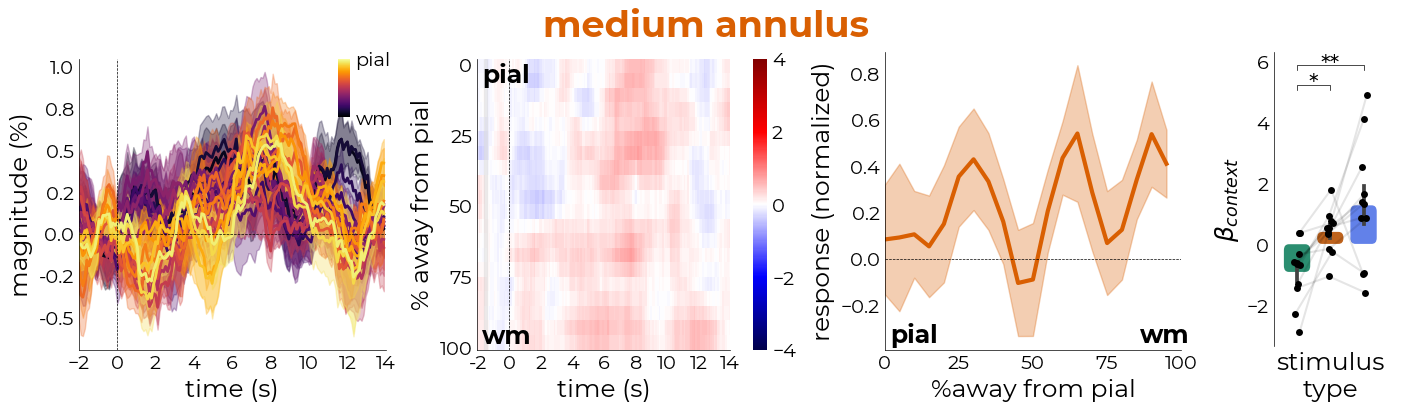

In [635]:
%matplotlib inline
center_hrf = None

df_comps = comp_excl.copy()
evs = utils.get_unique_ids(df_comps, id="event_type")

incl_evs = [
    "medium annulus"
]

model = "double_bump_deriv"

ncols = 4
fig = plt.figure(figsize=(14,len(incl_evs)*4), constrained_layout=True)
sf = fig.subfigures(ncols=ncols, width_ratios=[0.3,0.3,0.3,0.15])

ref_data = df_comps.groupby(["subject","event_type","t"]).mean()
interval = [4,6]
time_df = utils.select_from_df(
    ref_data, 
    expression=(
        f"t > {interval[0]}",
        "&",
        f"t < {interval[1]}"
    )
)

time_avg = time_df.groupby(["subject","event_type"]).mean()

tcs = {}
kws = {}

# get reference data
ax_dict = {}
for i in range(ncols):
    ax_dict[f"ax{i+1}"] = sf[i].subplots(nrows=len(incl_evs), **kws)

in_data = df_comps.groupby(["event_type","t"]).mean()
ref_hrf = hr.viz.XinYuPlot.single_xinyu_plot(
    utils.select_from_df(in_data, expression=f"event_type = act"),
    bsl=20,
    skip_plot=True
)["orig"].mean(axis=1).values


for ix,nn in enumerate(incl_evs):
    
    for k,v in ax_dict.items():
        if not isinstance(v, (list,np.ndarray)):
            ax_dict[k] = [v]

    ev = subj_obj.ev_mapper[nn]
    print(f"  {nn} ({ev})")

    # Xin-Yu plot 
    xy = hr.viz.XinYuPlot.single_xinyu_plot(
        utils.select_from_df(in_data, expression=f"event_type = {ev}"),
        axs=ax_dict["ax2"][ix],
        force_int=True,
        time_dec=0,
        time_ticks=9,
        depth_ticks=5,
        sns_kws={
            "vmin": -4,
            "vmax": 4
        },
        annot_color="k",
        contours=False,
        annot_onset=True,
        bsl=20
    )

    # stim onset
    hr.viz.add_axvspan(
        ax_dict["ax2"][ix],
        loc=interval
    )

    # Profiles
    if ix == 0:
        add_lbl = [f"{int(i)}%" for i in np.linspace(0,100,in_data.shape[0])]
    else:
        add_lbl = None
    
    grouper = utils.select_from_df(
        ref_data, 
        expression=f"event_type = {ev}"
    ).groupby(["t"])

    # get SEM from original inputs | profile list from "orig"-keys = shifted baseline
    sem_data = list(grouper.sem().values.T)
    prof_data = list(xy["orig"].values.T)

    # plot magnitude X time profiles
    t_ = utils.get_unique_ids(ref_data, id="t")
    pl = plotting.LazyPlot(
        prof_data[::-1],
        xx=t_,
        x_ticks=np.arange(t_[0],t_[-1]*1.1, step=2),
        axs=ax_dict["ax1"][ix],
        cmap="inferno",
        add_hline=0,
        add_vline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2,
        y_dec=1,
        error=sem_data
    )

    tcs[nn] = prof_data
    
    # make colorbar for depth
    if ix == 0:
        ax_inset = pl.axs.inset_axes([0.845,0.8,0.04,0.2])
        cb = plotting.LazyColorbar(
            cmap=pl.cmap,
            axs=ax_inset,
            cm_nr=2,
        )

        cb.axs.set_yticklabels(["wm","pial"])

    # weight subject-specific depth profiles by average HRF of center response
    idx_t0 = utils.find_nearest(t_, 0)[0]
    ref_hrf[:idx_t0] = 0
    ref_hrf[ref_hrf<0] = 0
    
    # calculate weighted HRF
    zsc = norm = False
    y_lbl = "response"
    vi = "norm"
    if vi == "zscore":
        zsc,norm = True,False
        y_lbl = "response (zscore)"
    elif vi == "norm":
        zsc,norm = False,True
        y_lbl = "response (normalized)"

    dd = hr.data.weighted_hrf_depth(
        xy["orig"],
        ref_data,
        ev=ev,
        hrf=ref_hrf,
        bsl=xy["bsl"],
        zscore=zsc,
        norm=norm
    )

    # plot weighted HRF
    ddict = hr.viz.make_wm_pial_ticks(dd["avg"])
    mm = hr.viz.plot_weighted_depth_hrf(
        dd,
        axs=ax_dict["ax3"][ix],
        cms=["#cccccc",subj_obj.color_dict[nn]],
        # y_label="sum(depth*avg)/sum(avg)",
        y_label=y_lbl,
        x_label="%away from pial",
        # title={
        #     "title": "weighted",
        #     "color": "white"
        # },
        x_ticks=ddict["ticks"],
        x_ticklabels=ddict["labels"],
        add_hline=0,
        ci=1.96,
        subjects=False,
        **dd
    )

    # annotate plot
    hr.viz.annotate_cortical_ribbon(
        mm["axs"],
        pial_pos=(0.02,0.025),
        wm_pos=(0.86,0.025),
        fontsize=pl.font_size,
        fontweight="bold"
    )

    # bar plot
    stat = "beta"
    double_deriv_cf = utils.multiselect_from_df(res["beta_sum"], expression=[f"model = {model}"])
    br = plotting.LazyBar(
        double_deriv_cf,
        x="event_type",
        y=stat,
        # x_label="stimulus type",
        axs=ax_dict["ax4"][ix],
        add_points=True,
        points_color="k",
        y_label=r"$\beta_{context}$",
        x_label="stimulus\ntype",
        # add_labels=True,
        sns_offset=4,
        bar_legend=True,
        sns_rot=-25,
        # title={
        #     "title": f"{key} | {vi}",
        #     "fontweight": "bold"
        # },
        bbox_to_anchor=(0.95,1),
        fancy=True,
        palette=subj_obj.ev_colors, #[::2],
        connect=True
    )

    normality = pg.normality(br.data[br.y])
    # is_normal = normality["normal"][0]
    aov = glm.ANOVA(
        data=br.data,
        dv=br.y,
        between=br.x,
        # test="test",
        parametric=True,
        posthoc_kw={
            "effsize": "cohen",
            "test": "test",
            "paired": True,
            "subject": "subject",
            "padjust": "holm"
        }
    )

    aov.plot_bars( 
        axs=br.ff,
        ast_frac=-0.035,
        y_pos=1.05,
        line_separate_factor=-0.075
    )

    print(aov.posthoc)

fig.suptitle(
    "medium annulus", 
    fontsize=(pl.title_size*1.1), 
    color=subj_obj.color_dict[nn], 
    fontweight="bold"
)

# save
# fig.suptitle(f"{vi} | {key}", fontsize=26)
hr.viz._save_figure(
    fig, 
    fname=f"group_voxel-corr_method-{vi}_desc-depth_imshow_profiles_stats_n", 
    overwrite=True
)

In [153]:
pg.homoscedasticity(br.data, dv=br.y, group="event_type")

W      pval  equal_var
levene  0.793258  0.461629       True

### fMRI vs ephys

In [315]:
comp_excl = pd.concat([utils.select_from_df(comp_df, expression=f"subject = {sub}") for sub in include_subjs])

comp_excl.head()

0         1         2  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  0.630385 -0.239497  1.500266   
                                  -1.894737  0.571895 -0.321802  1.465591   
                                  -1.789474 -0.009266 -1.035793  1.017260   
                                  -1.684211 -0.992481 -1.888901 -0.096061   
                                  -1.578947 -1.135379 -1.780816 -0.489943   

                                                    3         4         5  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  3.240028  2.311503  0.493548   
                                  -1.894737  3.252984  2.429860  0.736565   
                                  -1.789474  3.070313  2.421918  0.873040   
                                  -1.684211  1.696778  1.634299  0.953380   
                                  -1.578947  0.800929  0.760801  0.277005   

                                                    6         7         8  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -0.636957  0.294886  1.226730   
                                  -1.894737 -0.339304  0.437110  1.213524   
                                  -1.789474 -0.095066  0.679145  1.453356   
                                  -1.684211  0.615390  1.306187  1.996985   
                                  -1.578947  0.188339  1.285059  2.381780   

                                                    9        10        11  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000  0.187664 -1.508370 -2.492625   
                                  -1.894737  0.055865 -1.746485 -2.736501   
                                  -1.789474  0.286776 -1.526734 -2.603170   
                                  -1.684211  0.737841 -1.171282 -2.353904   
                                  -1.578947  1.129384 -0.906050 -2.245660   

                                                   12        13        14  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -1.341541 -0.190457 -0.026837   
                                  -1.894737 -1.289514  0.157472  0.435645   
                                  -1.789474 -1.468380 -0.333591  0.092663   
                                  -1.684211 -1.357018 -0.360133 -0.049205   
                                  -1.578947 -1.497797 -0.749934 -0.415443   

                                                   15        16        17  \
subject task run event_type epoch t                                         
001     SRFa 1   act        0     -2.000000 -0.192371 -0.369028 -0.579055   
                                  -1.894737  0.324214  0.270976  0.392322   
                                  -1.789474  0.282739  0.469596  0.646800   
                                  -1.684211  0.033069  0.215174  0.696770   
                                  -1.578947 -0.218742  0.082698  0.698356   

                                                   18        19  
subject task run event_type epoch t                              
001     SRFa 1   act        0     -2.000000 -0.789081 -0.684068  
                                  -1.894737  0.513668  0.452995  
                                  -1.789474  0.824003  0.735401  
                                  -1.684211  1.178366  0.937568  
                                  -1.578947  1.314014  1.006185

center
{'vmin': -4, 'vmax': 4}
{'vmin': -4, 'vmax': 4, 'axs': <Axes: label='<colorbar>'>}
medium annulus
{'vmin': -4, 'vmax': 4}
{'vmin': -4, 'vmax': 4, 'axs': <Axes: label='<colorbar>'>}
large annulus
{'vmin': -4, 'vmax': 4}
{'vmin': -4, 'vmax': 4, 'axs': <Axes: label='<colorbar>'>}
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-depth_imshow_profiles2.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-depth_imshow_profiles2.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/group_desc-depth_imshow_profiles2.svg'


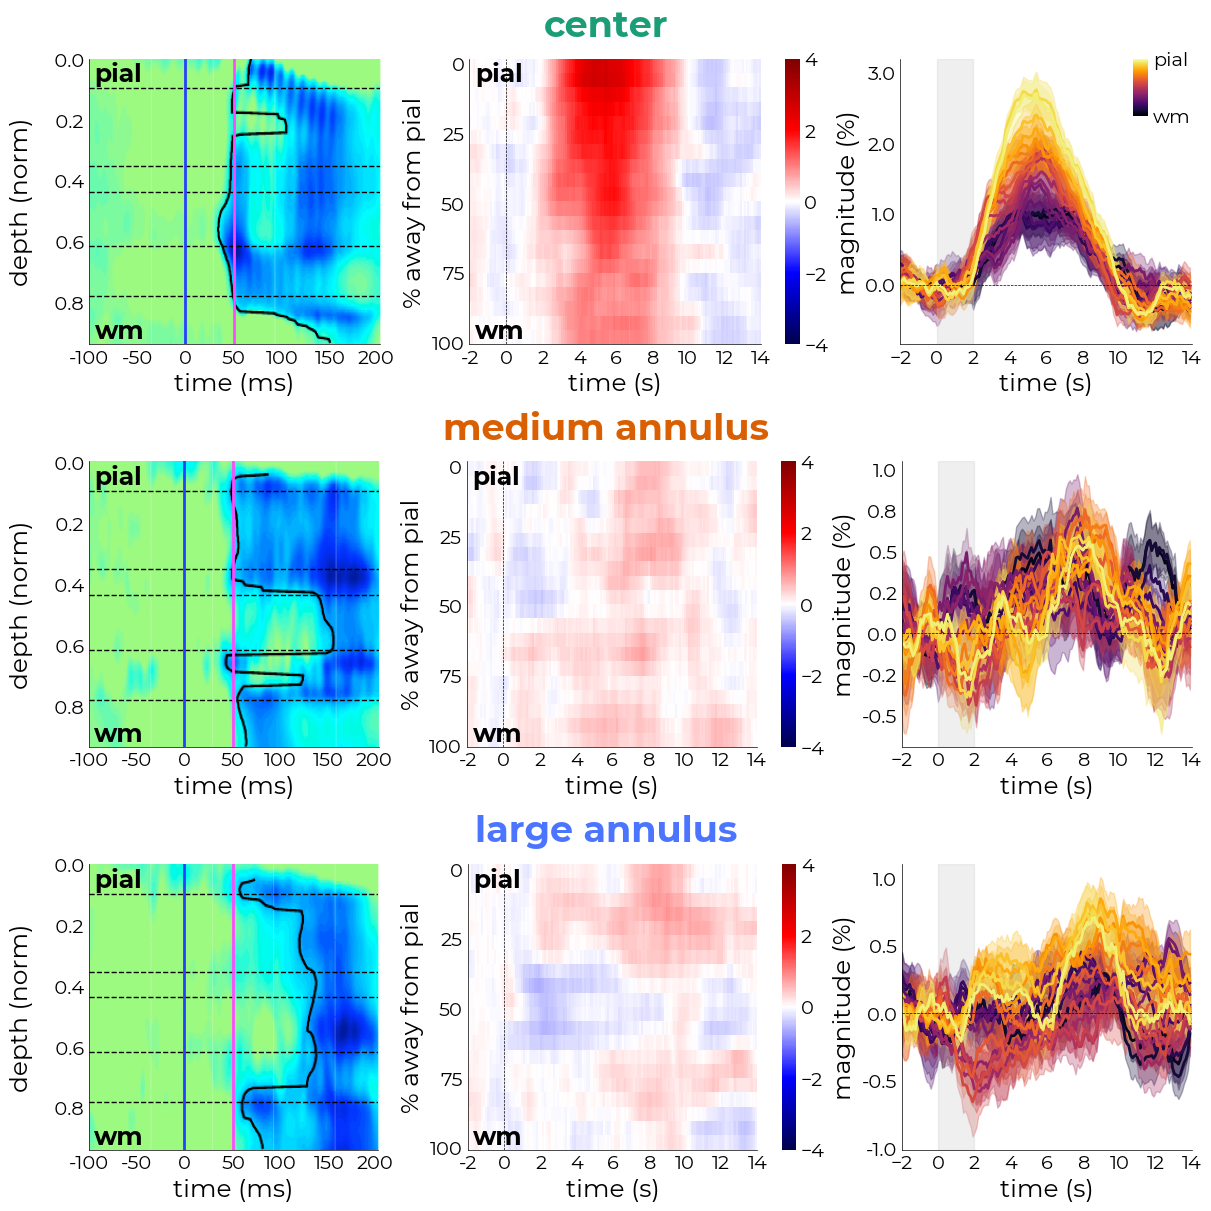

In [338]:
# ephys vs fmri
evs = utils.get_unique_ids(comp_excl, id="event_type")
fig = plt.figure(figsize=(12,12), constrained_layout=True)
sf = fig.subfigures(nrows=len(evs))

ref_data = comp_excl.groupby(["subject","event_type","t"]).mean()
tcs = {}
for ix,(ev,nn) in enumerate(zip(evs,subj_obj.get_evs())):
    
    print(nn)
    axs = sf[ix].subplots(ncols=3)

    # plot Bijanzadeh fiures
    ax1 = axs[0]
    b_ = hr.viz.BijanzadehFigures.plot_single_bijanzadeh(
        subj_obj.bijanzadeh_figures[nn],
        axs=ax1,
        x_label="time (ms)",
        y_label="depth (norm)"
    )


    # fMRI 
    in_data = comp_excl.groupby(["event_type","t"]).mean()
    ax2 = axs[1]
    xy = hr.viz.XinYuPlot.single_xinyu_plot(
        utils.select_from_df(in_data, expression=f"event_type = {ev}"),
        axs=ax2,
        force_int=True,
        time_dec=0,
        time_ticks=9,
        depth_ticks=5,
        # bsl=20,
        sns_kws={
            "vmin": -4,
            "vmax": 4
        },
        annot_color="k",
        contours=False,
        annot_onset=True,
        bsl=20
    )
    
    # Profiles
    ax3 = axs[2]
    if ix == 0:
        add_lbl = [f"{int(i)}%" for i in np.linspace(0,100,in_data.shape[0])]
    else:
        add_lbl = None
    
    grouper = utils.select_from_df(
        ref_data, 
        expression=f"event_type = {ev}"
    ).groupby(["t"])

    # get SEM from original inputs | profile list from "orig"-keys = shifted baseline
    sem_data = list(grouper.sem().values.T)
    prof_data = list(xy["orig"].values.T)

    # get time axis
    t_ = utils.get_unique_ids(ref_data, id="t")
    pl = plotting.LazyPlot(
        prof_data[::-1],
        xx=t_,
        x_ticks=np.arange(t_[0],t_[-1]*1.1, step=2),
        axs=ax3,
        cmap="inferno",
        add_hline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2,
        y_dec=1,
        error=sem_data
    )

    tcs[nn] = prof_data
    
    # make colorbar for depth
    if ix == 0:
        ax_inset = pl.axs.inset_axes([0.8,0.8,0.05,0.2])
        cb = plotting.LazyColorbar(
            cmap=pl.cmap,
            axs=ax_inset,
            cm_nr=2,
        )

        cb.axs.set_yticklabels(["wm","pial"])

    # stim onset
    hr.viz.add_axvspan(ax3)
    sf[ix].suptitle(
        nn, 
        color=subj_obj.get_colors()[ix],
        fontsize=pl.title_size*1.1, 
        fontweight="bold"
    )

# save
hr.viz._save_figure(
    fig, 
    fname="group_desc-depth_imshow_profiles2", 
    overwrite=True
)

In [548]:
corr_df

0         1         2  \
preproc method event_type      subject                                 
corr    norm   center          1        3.060355  3.061141  2.894289   
                               2        2.500304  2.677791  2.157537   
                               5        2.560171  2.688448  2.087187   
                               6        1.872767  1.987979  1.641197   
                               8        4.006025  3.704616  1.457791   
                               10       2.366752  2.563166  2.121649   
                               11       2.597183  2.714311  2.314777   
                               13       3.285149  3.327475  3.112992   
                               14       1.784546  2.044245  1.765953   
                               15       2.814012  3.045537  2.417208   
                               22       2.821787  3.097480  2.819189   
               medium\nannulus 1        0.416602  0.752350  0.096321   
                               2        0.311210  0.423862  0.214025   
                               5        0.425775  0.428543  0.442423   
                               6       -0.182407 -0.713318 -0.082077   
                               8       -0.662657 -0.616576 -0.380265   
                               10       0.238647  0.300776  0.240137   
                               11      -0.475601 -0.672766 -0.262968   
                               13       0.022362  0.057584 -0.074582   
                               14       0.634342  0.738920  0.745694   
                               15       0.209713  0.265986  0.168908   
                               22      -0.030026  0.038230  0.045004   
               large\nannulus  1        0.554751  0.259209  1.068859   
                               2        0.143341  0.150386  0.354863   
                               5        0.048535  0.061389  0.291303   
                               6        0.755678  0.935152  0.921269   
                               8       -0.139085  0.130581  1.624737   
                               10       0.647069  0.954992  0.791252   
                               11      -0.104431 -0.162899  0.172603   
                               13       0.011537 -0.026178  0.431297   
                               14       0.218731  0.152847  0.316062   
                               15       0.724743  0.878656  0.789396   
                               22       0.547355  0.682965  0.846180   

                                               3         4         5  \
preproc method event_type      subject                                 
corr    norm   center          1        2.879197  2.551745  2.104351   
                               2        1.789043  1.707960  1.706860   
                               5        1.684478  1.574658  1.468655   
                               6        1.446175  1.345055  1.376033   
                               8        1.462933  2.144702  2.565174   
                               10       1.831891  1.650922  1.656633   
                               11       2.067002  1.852390  1.633011   
                               13       2.994997  2.659564  2.327950   
                               14       1.436228  1.165421  0.898431   
                               15       1.940639  1.679448  1.474228   
                               22       2.473469  2.186667  1.903683   
               medium\nannulus 1       -0.592437 -0.379552  0.162670   
                               2       -0.028539 -0.102935 -0.092485   
                               5        0.391427  0.254008  0.170149   
                               6        0.516437  1.040225  1.071109   
                               8       -0.436029 -0.493761  0.198709   
                               10       0.146771  0.186879  0.497483   
                               11       0.114101  0.175903  0.161407   
                               13      -0.143849  0.339326  0.876062   
              

### Event-specific model fits

Plotting center..
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_center_corr_norm.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_center_corr_norm.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_center_corr_norm.svg'
Plotting large annulus..
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_large_annulus_corr_norm.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_large_annulus_corr_norm.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_large_annulus_corr_norm.svg'
Plotting medium annulus..
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/model_fits2_medium_annulus_corr_norm.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/hole

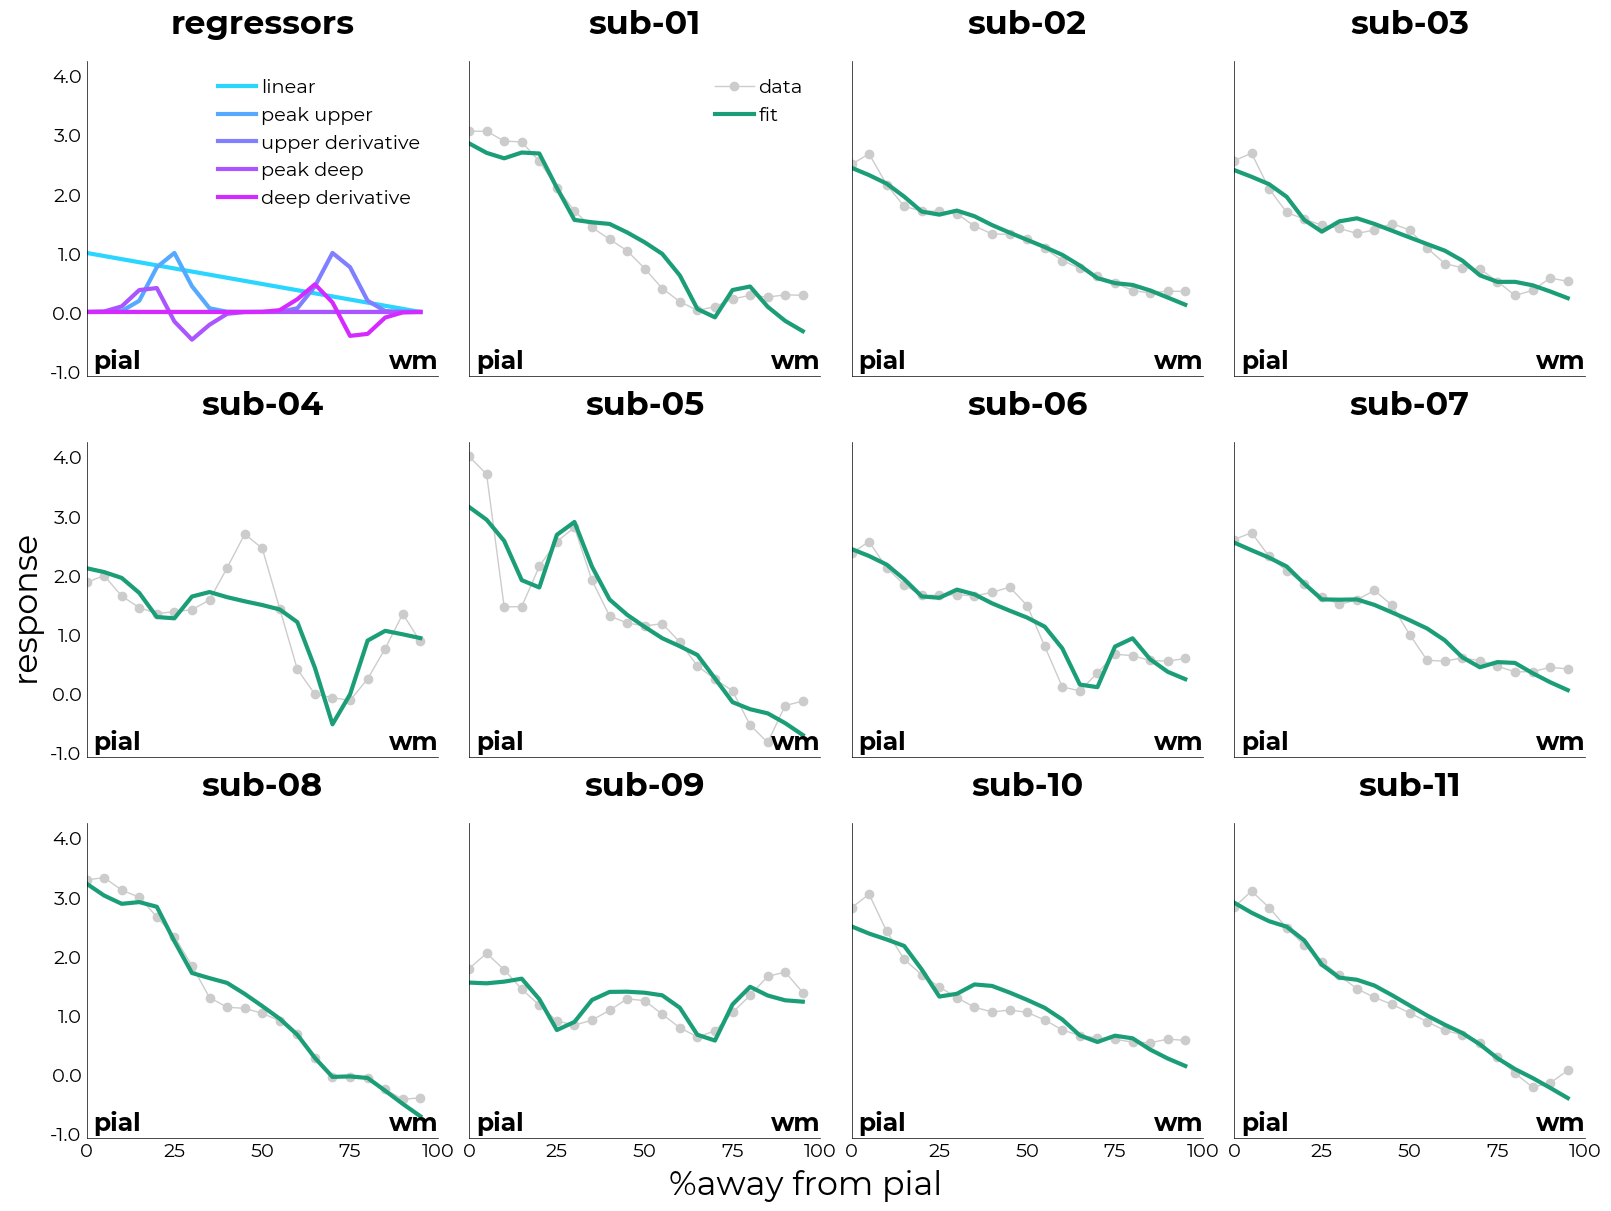

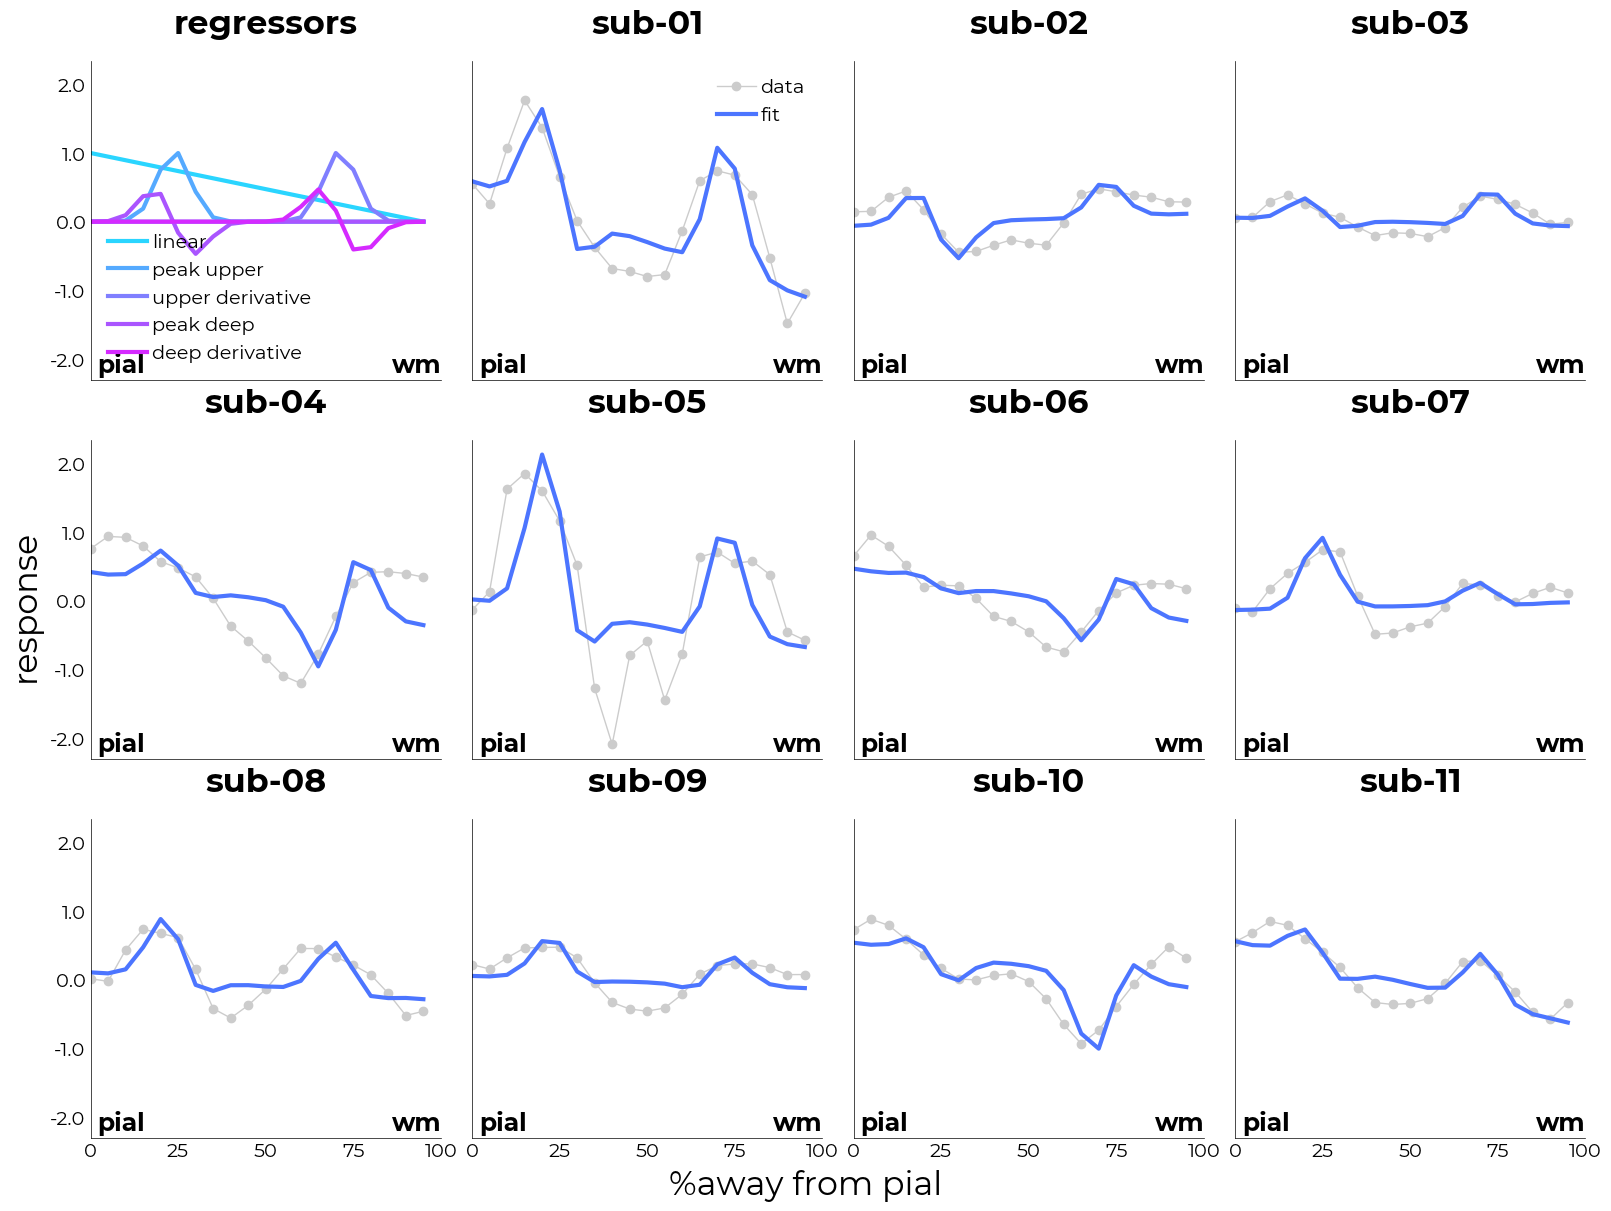

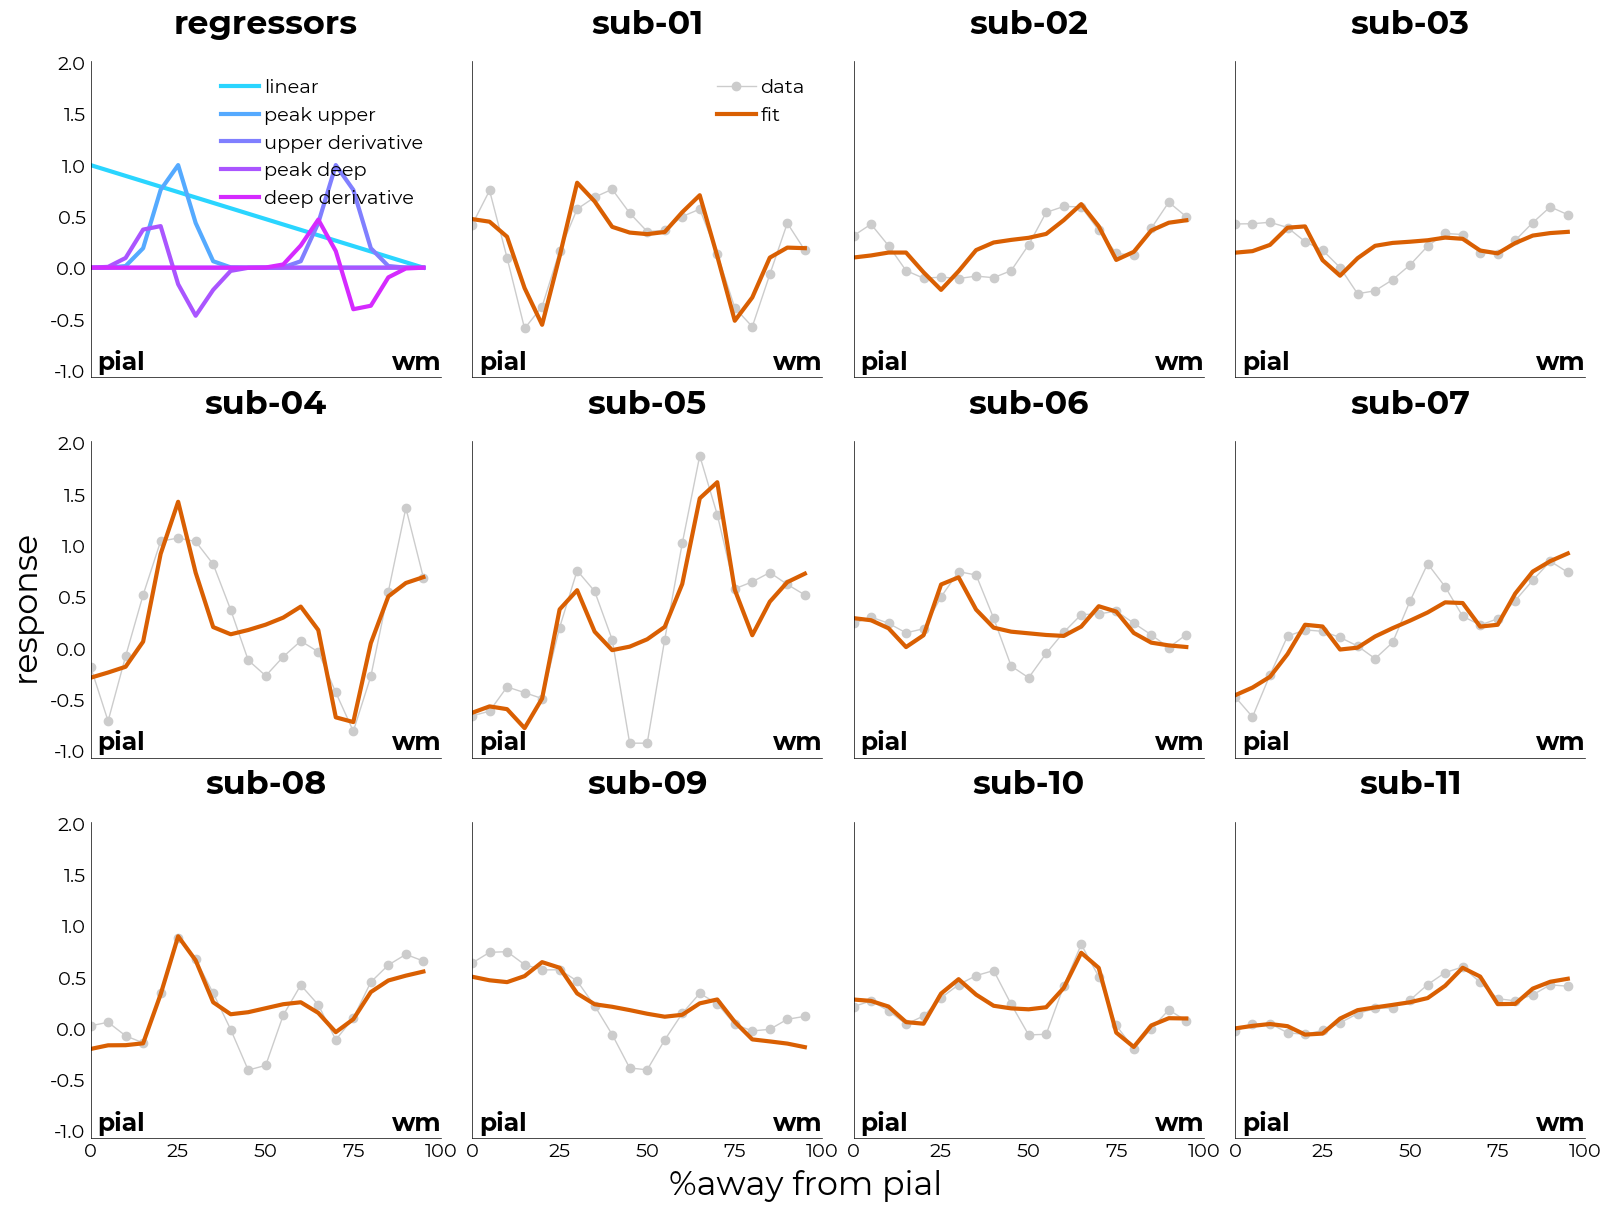

In [568]:
regressors = "double_bump_deriv"
if regressors == "double_bump_deriv":
    reg_lbls = [
        "linear",
        "peak upper",
        "upper derivative",
        "peak deep",
        "deep derivative"
    ]
elif regressors == "camel":
    reg_lbls = [
        "linear",
        "1st peak",
        "2nd peal",
    ]
else:
    reg_lbls = ["linear"]

preds = utils.select_from_df(res["predictions"], expression=f"model = {regressors}")
evs = utils.get_unique_ids(preds, id="event_type")
n_subjects = utils.get_unique_ids(preds, id="subject")

ncols = 4
n_elem = len(n_subjects)
nrows = int(np.ceil(n_elem/ncols))

# cm = sns.color_palette("Reds")[::2]
dm_no_icpt = reg_dict[regressors][:,1:]
reg_cm = sns.color_palette("cool", dm_no_icpt.shape[-1])


cm = ["#000000","b"]
colors = sns.color_palette("viridis", n_elem)

# evs = ["large\nannulus"]
for ev in evs:

    fig,axs = plt.subplots(
        figsize=(ncols*4,nrows*4),
        ncols=ncols,
        nrows=nrows,
        constrained_layout=True,
        sharex=True,
        sharey=True
    )

    ev_name = ev.replace("\n", " ")
    print(f"Plotting {ev_name}..")
    
    color = subj_obj.color_dict[ev_name]
    ev_data = utils.multiselect_from_df(corr_df, expression=[f"event_type = {ev}"]).values.T
    ev_pred = utils.multiselect_from_df(preds, expression=[f"event_type = {ev}"]).values.T
    y_lbl = "response"

    for ix,ax in enumerate(axs.flatten()):

        lbls = 0
        if ix == 0:
            lbls = reg_lbls
        elif ix == 1:
            lbls = ["data", "fit"]
        else:
            lbls = None
        
        
        if ix == 0:

            # plot regressors
            pl = plotting.LazyPlot(
                list(dm_no_icpt.T),
                axs=ax,
                line_width=3,
                color=reg_cm,
                labels=lbls,
                title={
                    "title": "regressors",
                    "fontweight": "bold",
                },
                y_dec=1
            )

        else:
            
            sub_name = f"sub-{str(ix).zfill(2)}"
            data_list = [
                ev_data[:,ix-1],
                ev_pred[:,ix-1]
            ]
            ddict = hr.viz.make_wm_pial_ticks(data_list[0])
            def_dict = {
                "color": ["#cccccc", color],
                "axs": ax,
                "line_width": [1,3],
                "markers": ["o",None],
                "labels": lbls,
                "title": {
                    "title": sub_name,
                    "fontweight": "bold",
                    # "color": colors[ix-1]
                },
                "x_ticks": ddict["ticks"],
                "x_ticklabels": ddict["labels"],
                "y_dec": 1
            }

            pl = plotting.LazyPlot(
                data_list,
                **def_dict
            )

        hr.viz.annotate_cortical_ribbon(
            ax,
            pial_pos=(0.02,0.025),
            wm_pos=(0.86,0.025),
            fontsize=pl.font_size,
            fontweight="bold"
        )

    fig.supylabel(y_lbl, fontsize=24)
    fig.supxlabel("%away from pial", fontsize=24)

    ev_= ev.replace("\r","").replace("\n","_")

    hr.viz._save_figure(
        fig, 
        fname=f"model_fits2_{ev_}_corr_norm", 
        overwrite=True
    )